# 1. Importing Essential Libraries for Analysis

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries for data plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical libraries for data preprocessing
from scipy import stats
from scipy.stats import skew

# Warning management to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Loading Dataset

In this analysis, we are using the **Titanic Dataset**, which is a well-known dataset containing information about passengers aboard the Titanic. Our goal is to perform exploratory data analysis (EDA), preprocess the data, and extract meaningful insights.

In [2]:
df = pd.read_csv("titanic.csv")
pd.set_option('display.max_columns', None) # for seeing all columns in data sample

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Description

The Titanic dataset contains the following important columns:

- **PassengerId**: Unique ID of each passenger.
- **Survived**: Survival (0 = No, 1 = Yes).
- **Pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
- **Name**: Name of the passenger.
- **Sex**: Gender of the passenger.
- **Age**: Age in years.
- **SibSp**: Number of siblings/spouses aboard.
- **Parch**: Number of parents/children aboard.
- **Ticket**: Ticket number.
- **Fare**: Passenger fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# 3. Data Cleaning

In [4]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.000,B96 B98,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.700,C118,C
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.000,E101,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.775,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.250,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.1 Handling Missing values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print("\nMissing Values:\n", missing_data)


Missing Values:
              Missing Values  Percentage
PassengerId               0    0.000000
Survived                  0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
Age                     177   19.865320
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      0    0.000000
Cabin                   687   77.104377
Embarked                  2    0.224467


Some columns have missing values that need to be handled.  
- The **"Cabin"** column has **77.1% missing values**, making it unsuitable for imputation.  
  🔹 **Action:** We will drop this column to maintain data quality.  
- The **"Age"** column has missing values, we will fill them with the median age.  
- The **"Embarked"** column is a categorical column, we will fill the missing value with the mode of the column.

In [8]:
# Dropping 'Cabin' column due to excessive missing values
df.drop(columns=['Cabin'], inplace=True)

# Filling missing values in numerical columns
df['Age'].fillna(df['Age'].median(), inplace=True)  # Replacing missing age with median

# Filling missing values in categorical columns
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Replacing missing Embarked with most frequent value

# Verifying if missing values are handled
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 3.2 Identify and remove duplicate records

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [10]:
print(df.duplicated().sum())

0


- There were **no duplicates** identified, if it would have been we could have used: **df = df.drop_duplicates(inplace=True)**

## 3.3 Standardize categorical values (e.g., fixing typos or formatting inconsistencies).
- Since categorical values may have typos, inconsistent formatting, or different cases (e.g., "male" vs "Male"), we need to standardize them.

In [11]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,S
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,S
409,410,0,3,"Lefebre, Miss. Ida",female,28.0,3,1,4133,25.4667,S


In [12]:
# Standardizing Categorical Values
# Standardize Ticket Formatting
df['Ticket'] = df['Ticket'].str.upper().str.strip()

# Standardize Values
df['Sex'] = df['Sex'].str.lower()  
df['Embarked'] = df['Embarked'].str.upper()
df['Sex'] = df['Sex'].str.strip()
df['Embarked'] = df['Embarked'].str.strip()
print(df['Sex'].unique())       # Should be only ['male', 'female']
print(df['Embarked'].unique())  # Should be only ['C', 'Q', 'S']
print(df['Ticket'].sample(10))
print(df['Ticket'].unique())

['male' 'female']
['S' 'C' 'Q']
583            13049
267           347083
862            17466
334         PC 17611
43     SC/PARIS 2123
36              2677
643             1601
700         PC 17757
139         PC 17593
637       C.A. 31921
Name: Ticket, dtype: object
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/PARIS 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123

#### **Standardizing Ticket Data for Consistency**

The **'Ticket'** column contains alphanumeric ticket codes with inconsistencies in formatting (e.g., extra spaces, mixed cases, and special characters). To standardize these values:

- Converted all values to **uppercase** and **removed extra spaces**.
- Removed **non-alphanumeric characters** to ensure uniformity.
- Extracted **ticket prefixes** (alphabetic part) and **ticket numbers** (numeric part).
- Converted the ticket numbers to **numeric format** for consistency.
- Filled missing ticket prefixes with **'UNKNOWN'** to avoid missing values.


In [13]:
# Handling Ticket
df['Ticket'] = df['Ticket'].str.upper().str.strip()
df['Ticket'] = df['Ticket'].str.replace(r'[^A-Z0-9]', '', regex=True)

# Extract prefix and number separately
df['Ticket_Prefix'] = df['Ticket'].str.extract(r'([A-Z]+)')
df['Ticket_Number'] = df['Ticket'].str.extract(r'(\d+)$')
df['Ticket_Number'] = pd.to_numeric(df['Ticket_Number'], errors='coerce')

# Fill missing prefixes
df['Ticket_Prefix'] = df['Ticket_Prefix'].fillna('UNKNOWN')

print(df[['Ticket', 'Ticket_Prefix', 'Ticket_Number']].head(10))

          Ticket Ticket_Prefix  Ticket_Number
0        A521171             A       521171.0
1        PC17599            PC        17599.0
2  STONO23101282         STONO     23101282.0
3         113803       UNKNOWN       113803.0
4         373450       UNKNOWN       373450.0
5         330877       UNKNOWN       330877.0
6          17463       UNKNOWN        17463.0
7         349909       UNKNOWN       349909.0
8         347742       UNKNOWN       347742.0
9         237736       UNKNOWN       237736.0


In [14]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Embarked       891 non-null    object 
 11  Ticket_Prefix  891 non-null    object 
 12  Ticket_Number  887 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Prefix,Ticket_Number
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,UNKNOWN,17463.0
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,S,UNKNOWN,349206.0
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,C,UNKNOWN,111361.0
497,498,0,3,"Shellard, Mr. Frederick William",male,28.0,0,0,CA6212,15.1000,S,CA,6212.0
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A513032,7.7333,Q,A,513032.0


## 3.4 Detect and Treat Outliers

In [15]:
# Divide into Categorical and Numerical Columns
# Identify Numerical and Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Display the categorized columns
print("Numerical Columns:", numerical_columns, '\n')
print("Categorical Columns:", categorical_columns, '\n')

Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket_Number'] 

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Embarked', 'Ticket_Prefix'] 



In [16]:
print(df.nunique())
df.sample(5)

PassengerId      891
Survived           2
Pclass             3
Name             891
Sex                2
Age               88
SibSp              7
Parch              7
Ticket           681
Fare             248
Embarked           3
Ticket_Prefix     29
Ticket_Number    678
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_Prefix,Ticket_Number
159,160,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA2343,69.5500,S,CA,2343.0
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,S,UNKNOWN,348124.0
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,UNKNOWN,349224.0
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,S,UNKNOWN,315153.0
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP4348,9.3500,S,PP,4348.0


####  **Note on Categorical and Identifier Columns**

Although the **'Survived'** column contains numerical values (0 and 1), it actually represents categorical outcomes — **0** for *Not Survived* and **1** for *Survived*. Therefore, it should be treated as a **categorical variable** during analysis.

Additionally, columns like **'PassengerId'**, **'Name'**, and **'Ticket'** are merely identifiers and do not provide meaningful information for analysis or modeling. Hence, these columns should be **dropped** to avoid irrelevant noise in our dataset.

Although we standardized and extracted useful information from **'Ticket'**, further analysis shows that ticket numbers and prefixes do not provide meaningful insights for predictions.

- **'Ticket'**, **'Ticket_Prefix'**, and **'Ticket_Number'** are **not true categorical or numerical features**.
- These columns function as **unique identifiers** rather than features affecting survival.
- Keeping them may introduce unnecessary noise in the dataset.

Thus, to ensure **cleaner and more relevant data**, we **drop these columns** before proceeding.


In [17]:
# Dropping unnecessary identifier columns in one step for cleaner code
df.drop(['PassengerId', 'Name', 'Ticket', 'Ticket_Number', 'Ticket_Prefix'], axis=1, inplace=True)

# Defining numerical and categorical columns for further analysis
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_columns = ['Sex', 'Embarked', 'Survived', 'Pclass']

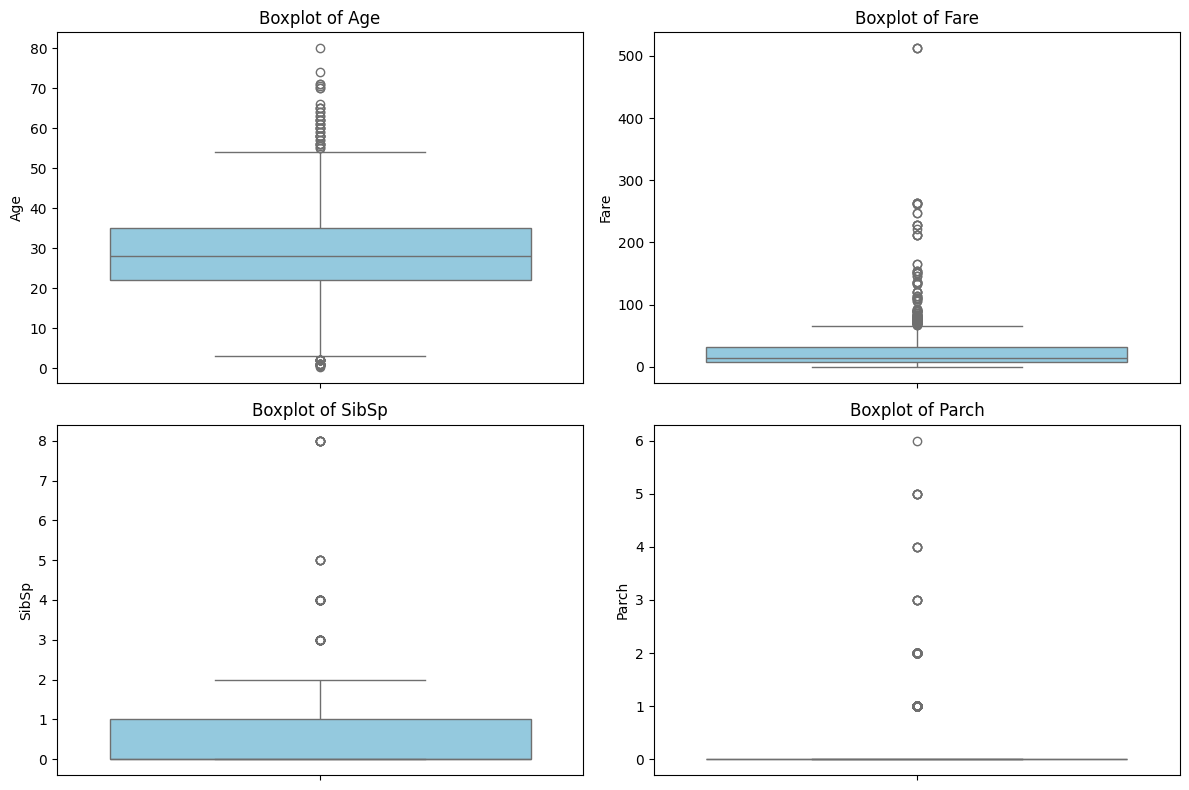

In [18]:
# Function to detect and visualize outliers for multiple numerical features
def visualize_outliers(df, columns):
    plt.figure(figsize=(12, 8))
    for idx, column in enumerate(columns, 1):
        plt.subplot(2, 2, idx) 
        sns.boxplot(y=df[column], color='skyblue')
        plt.title(f"Boxplot of {column}")
        plt.tight_layout()  
    plt.show()
    
visualize_outliers(df, numerical_columns)

In [19]:
# Outlier detection - 'Age'
mean_age = np.mean(df['Age']) 
std_dev_age = np.std(df['Age'])
Z_scores_age = (df['Age'] - mean_age) / std_dev_age # computes the Z-scores
outliers_age = df['Age'][np.abs(Z_scores_age) > 3] # finds all the data points that are 3 standard deviations away from the mean
upper_bound=mean_age + 1.5*std_dev_age
print("Outliers in 'Age' using Z-score: \n", outliers_age)
print("Upper_bound: ", upper_bound)

# Outlier detection - 'Fare'
mean_fare = np.mean(df['Fare']) 
std_dev_fare = np.std(df['Fare']) 
Z_scores_fare = (df['Fare'] - mean_fare) / std_dev_fare # computes the Z-scores
outliers_fare = df['Fare'][np.abs(Z_scores_fare) > 3] # finds all the data points that are 3 standard deviations away from the mean
print("\nOutliers in 'Fare' using Z-score: \n", outliers_fare)

print("\nSkewness:")
skew1 = df['Age'].skew()
skew2 = df['Fare'].skew()
print(f"Skewness of Age: {skew1}")
print(f"Skewness of Fare: {skew2}")

Outliers in 'Age' using Z-score: 
 96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
Upper_bound:  48.88016490077299

Outliers in 'Fare' using Z-score: 
 27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64

Skewness:
Skewness of Age: 0.5102446555756495
Skewness of Fare: 4.787316519674893


#### **Treating Outliers**

- **'Age'**:  
  Since 'Age' has a near-normal distribution, outliers are treated by removing values beyond 3 standard deviations from the mean.

- **'Fare'**:  
  Due to the skewed distribution of 'Fare', outliers are treated by limiting values to within 1.5 times the interquartile range (IQR) from the 1st and 3rd quartiles. (z score normalization will not work due to skewed distribution)

- **'SibSp' and 'Parch'**:  
  As 'SibSp' and 'Parch' represent discrete count data, outliers are treated by applying a predefined threshold value to remove extreme counts.


<Axes: >

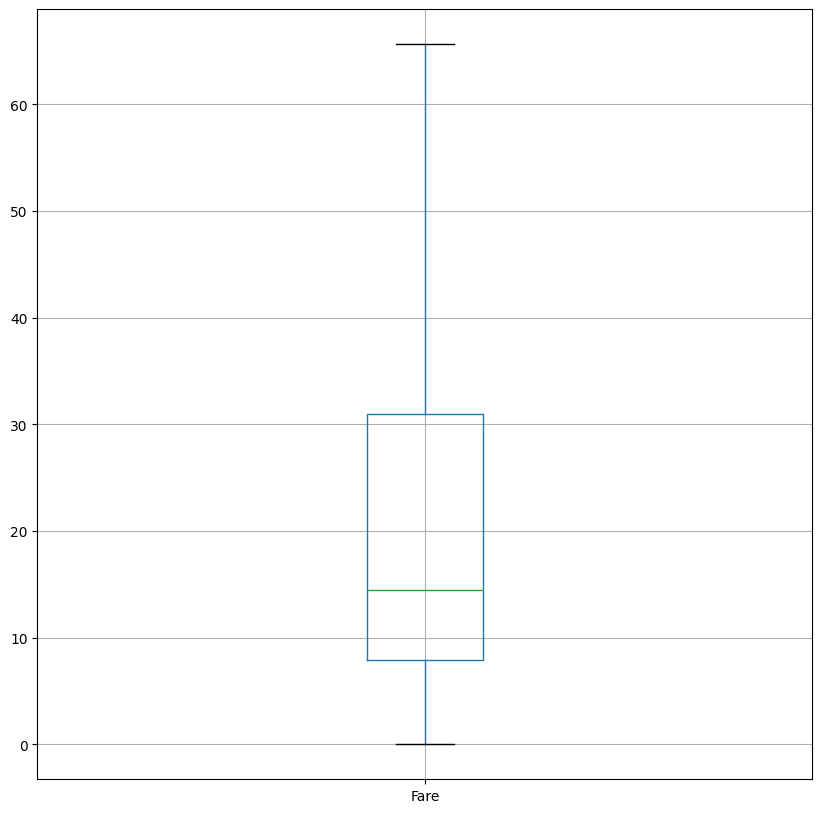

In [20]:
# Treat Outliers in 'Fare' using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers for 'fare'
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare']) # Outliers are at higher end only and not lower so no need of lower_bound
df.boxplot(column="Fare",figsize=(10,10))

In [21]:
# Calculate the upper bound for 'age'
uppper_bound_age =mean_age + 1.5*std_dev_age
lower_bound_age =mean_age - 1.5*std_dev_age
print(f"\nUpper_bound: {uppper_bound_age}, Lower_bound: {lower_bound_age}, mean: {mean_age}\n")


Upper_bound: 48.88016490077299, Lower_bound: 9.843000082391988, mean: 29.36158249158249



#### **Adjustment for 'Age' Upper Boundary**

We will not consider "1.5*df['feature'].std()" because the upper boundary for age is around 53 to 54 years (as seen in the boxplot), while the previous calculation gives 48.8 or 49 years. If we use this as the upper boundary, many of the 'true' age data points would be lost. Therefore, we will use "2*df['feature'].std()" as a more appropriate upper boundary for 'Age'.

In [22]:
upper_bound_age =mean_age + 2*std_dev_age
lower_bound_age =mean_age - 2*std_dev_age
print(f"\nUpper_bound: {uppper_bound_age}, Lower_bound: {lower_bound_age}, mean: {mean_age}\n")


Upper_bound: 48.88016490077299, Lower_bound: 3.336805945995156, mean: 29.36158249158249



<Axes: >

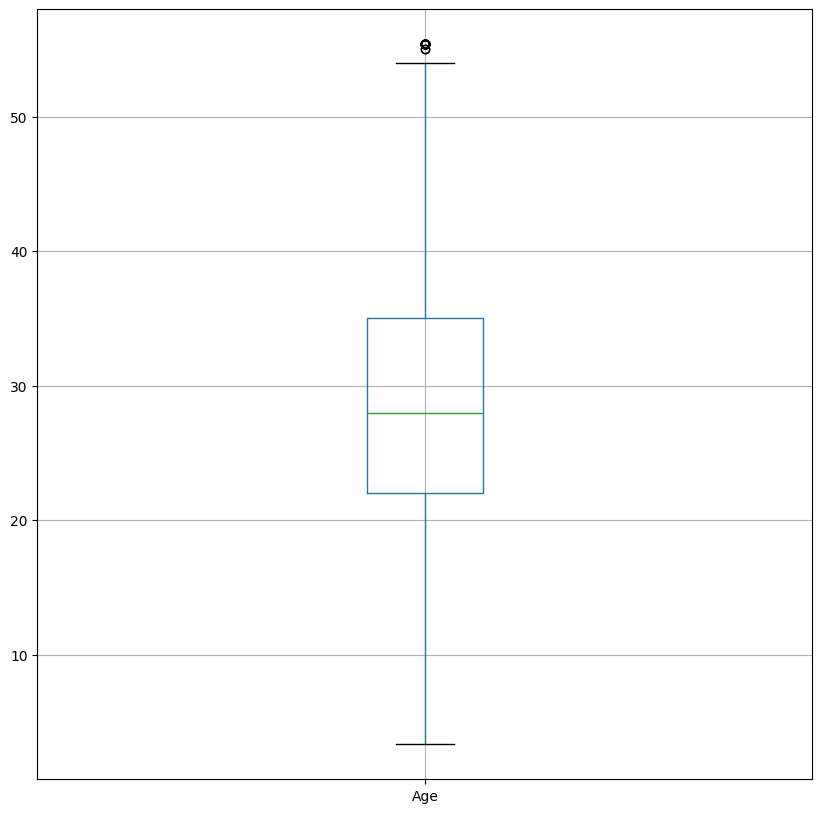

In [23]:
# Treat Outliers in "Age"
# Cap the outliers for 'Age'
df['Age'] = np.where(df['Age'] > upper_bound_age, upper_bound_age, df['Age'])
df['Age'] = np.where(df['Age'] < lower_bound_age, lower_bound_age, df['Age'])
df.boxplot(column="Age",figsize=(10,10))

In [24]:
# Treating Outliers from columns 'SibSp' and 'Parch' by setting a threshold 
df["SibSp"] = df["SibSp"].clip(upper=5) # Reasonable max value
df["Parch"] = df["Parch"].clip(upper=5) # Reasonable max value

# 4. Exploratory Data Analysis (EDA):

## 4.1  Univariate Analysis (Single-Variable Exploration)

## Numerical Features

In [25]:
# Descriptive Stats
summary_stats = df[numerical_columns].describe().T
summary_stats['mode'] = df[numerical_columns].mode().iloc[0]
summary_stats['skewness'] = df[numerical_columns].skew()
summary_stats['variance'] = df[numerical_columns].var()
summary_stats

,count,mean,std,min,25%,50%,75%,max,mode,skewness,variance
Age,891.0,29.105004,12.106028,3.336806,22.0000,28.0000,35.0,55.386359,28.0000,0.221966,146.555910
Fare,891.0,24.046813,20.481625,0.000000,7.9104,14.4542,31.0,65.634400,65.6344,1.082179,419.496943
SibSp,891.0,0.499439,0.966140,0.000000,0.0000,0.0000,1.0,5.000000,0.0000,2.698829,0.933427
Parch,891.0,0.380471,0.798890,0.000000,0.0000,0.0000,0.0,5.000000,0.0000,2.653861,0.638225


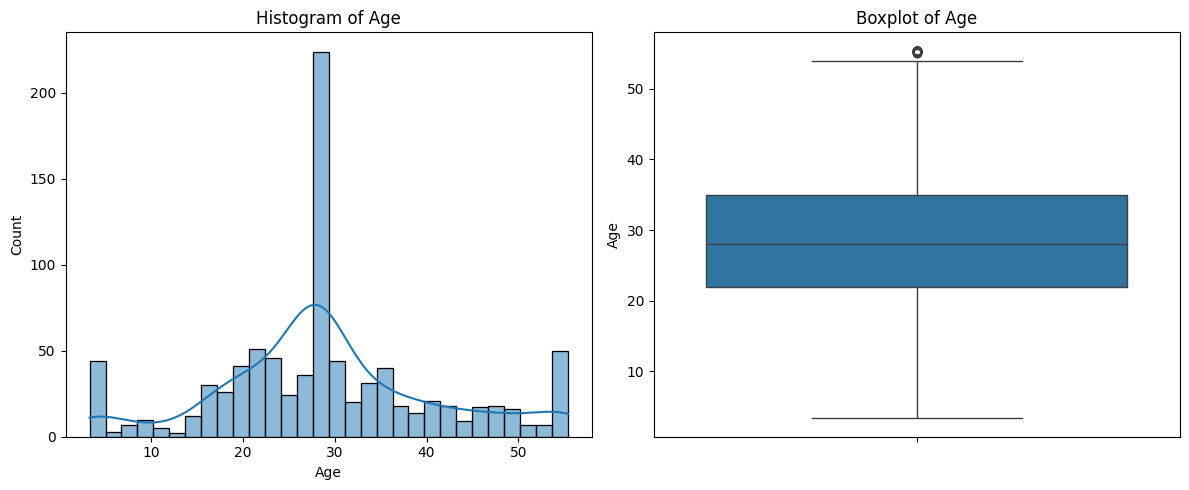

In [26]:
## Age Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df['Age'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histogram of Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Boxplot
sns.boxplot(y=df['Age'], ax=axes[1])
axes[1].set_ylabel("Age")
axes[1].set_title("Boxplot of Age")

plt.tight_layout()
plt.show()

#### **Age Distribution of Titanic Passengers**

The age distribution of Titanic passengers is:
- The **mean age** of the passengers is **29.1 years**, with a **standard deviation of 12.1 years**, indicating moderate dispersion.
- The **minimum age** recorded is **3.3 years**, while the **maximum age** is **55.4 years**.
- The **median (50th percentile) age is 28 years**, meaning half of the passengers are younger than 28.
- The **skewness (0.22)** it shows a slight **right skew**, indicating the presence of older passengers, also as is close to **0**, suggesting a nearly **symmetric distribution**.
- The **histogram** shows that most passengers are between **20 and 40 years old**, with a peak around 28 years also showing that it is unimodal.
- **Boxplot Insights**: Most passengers are between **20 and 38 years old**, with a few outliers above 50.
- **Diversity**: The dataset includes a wide age range, from **young children** to **elderly individuals**, although the majority of passengers were **young adults**.

These observations indicate a relatively young population, with a few older passengers skewing the data.


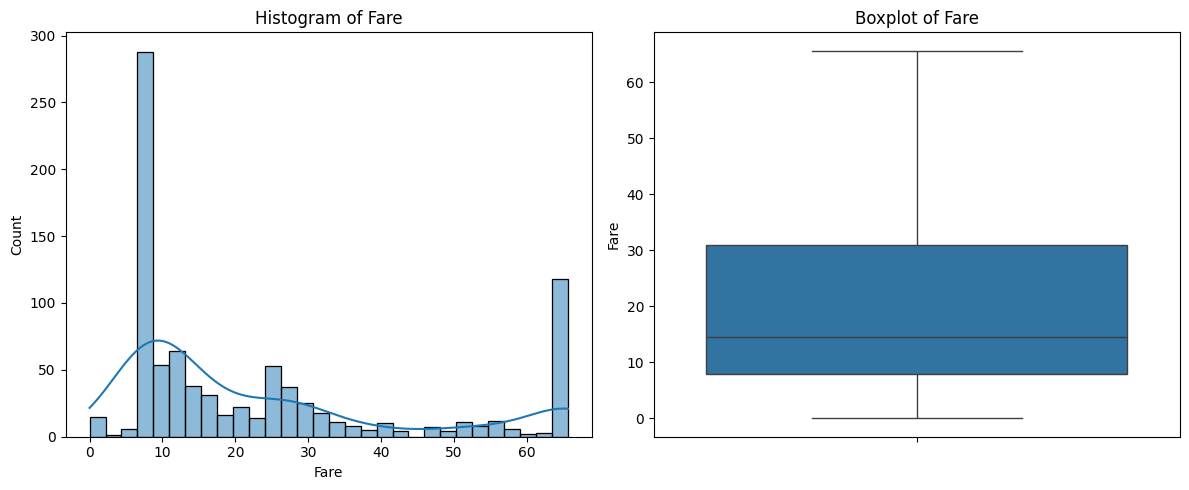

In [27]:
## Fare Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df['Fare'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histogram of Fare")
axes[0].set_xlabel("Fare")
axes[0].set_ylabel("Count")

# Boxplot
sns.boxplot(y=df['Fare'], ax=axes[1])
axes[1].set_ylabel("Fare")
axes[1].set_title("Boxplot of Fare")

plt.tight_layout()
plt.show()

## **Fare Distribution**

- The **mean fare** is **\$24.05**, with a **high standard deviation of \$20.48**, indicating a wide range of ticket prices.
- The **mode is \$65.63**, suggesting that many passengers paid this fare amount.
- The histogram **shows a large peak around low fare values**, indicating that many passengers traveled in **lower-class cabins**, while a **few passengers paid significantly higher fares**.
- The **fare distribution** in the Titanic dataset is **highly right-skewed**, with most passengers paying lower fares.
- The **boxplot confirms this skewness**, with the **median fare closer to the lower range** and a **long upper whisker**.
- There are **outliers at the higher end**, representing **first-class passengers who paid premium prices**.
- The presence of **zero fares** might indicate **complimentary or special-category tickets**.

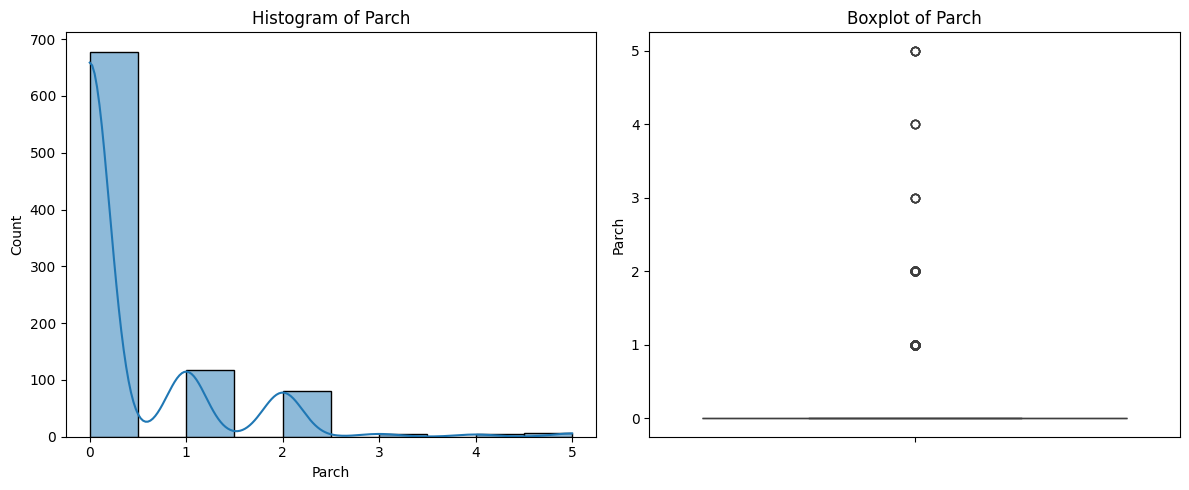

In [28]:
## Parch Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df['Parch'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Histogram of Parch")
axes[0].set_xlabel("Parch")
axes[0].set_ylabel("Count")

# Boxplot
sns.boxplot(y=df['Parch'], ax=axes[1])
axes[1].set_ylabel("Parch")
axes[1].set_title("Boxplot of Parch")

plt.tight_layout()
plt.show()

## **Parch Distribution**

- **Majority of passengers (nearly 680) have a Parch value of 0**, meaning they traveled **without parents or children**.
- The **Parch (Parents/Children Aboard) distribution** in the Titanic dataset is **heavily skewed towards zero**, indicating that most passengers traveled alone.  
- The **distribution is highly right-skewed**, with very few passengers traveling in large family groups.
- The histogram shows that **having a Parch value of 1 or 2 is uncommon**, and values **greater than 2 are rare**.
- **Family-oriented travel was not the norm**, as single or solo travelers dominated the dataset.

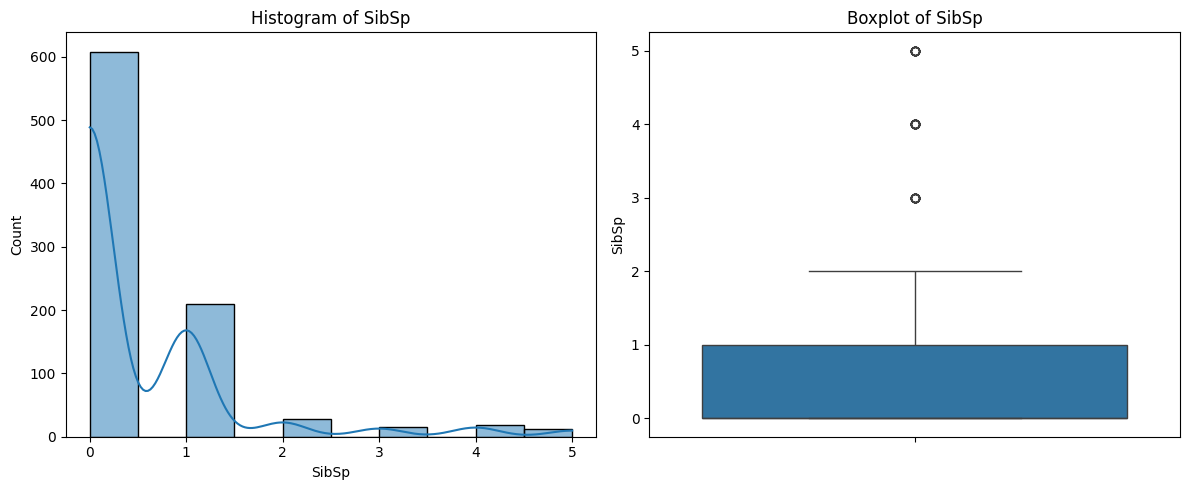

In [29]:
## SibSp Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df['SibSp'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Histogram of SibSp")
axes[0].set_xlabel("SibSp")
axes[0].set_ylabel("Count")

# Boxplot
sns.boxplot(y=df['SibSp'], ax=axes[1])
axes[1].set_ylabel("SibSp")
axes[1].set_title("Boxplot of SibSp")

plt.tight_layout()
plt.show()

## **SibSp Distribution**

- The **SibSp (Siblings/Spouses Aboard) distribution** in the Titanic dataset is **heavily skewed towards zero**, meaning that most passengers **traveled alone** without siblings or spouses.
- **A significant majority (~600 passengers) had a SibSp value of 0**, indicating they traveled **without siblings or spouses**.  
- The **count decreases sharply** for passengers with **1 or more companions** aboard.  
- The **distribution is highly right-skewed**, with only a few passengers having **large family groups** on board.  
- The histogram highlights that **most passengers were solo travelers**, while **traveling with a sibling or spouse was less common**.  

## Categorical Features

In [30]:
# descriptive stats
cat_stats = []

for col in categorical_columns:
    unique_count = df[col].nunique()
    mode_value = df[col].mode()[0]
    mode_count = df[col].value_counts().iloc[0]
    least_common = df[col].value_counts().idxmin()
    least_count = df[col].value_counts().min()
    
    cat_stats.append({
        "Feature": col,
        "Unique Categories": unique_count,
        "Most Frequent Category": mode_value,
        "Mode Count": mode_count,
        "Least Frequent Category": least_common,
        "Least Count": least_count
    })

cat_stats_df = pd.DataFrame(cat_stats)
print(cat_stats_df)

    Feature  Unique Categories Most Frequent Category  Mode Count  \
0       Sex                  2                   male         577   
1  Embarked                  3                      S         646   
2  Survived                  2                      0         549   
3    Pclass                  3                      3         491   

  Least Frequent Category  Least Count  
0                  female          314  
1                       Q           77  
2                       1          342  
3                       2          184  


Frequency Distribution for column Survived: 
Survived
0    549
1    342
Name: count, dtype: int64


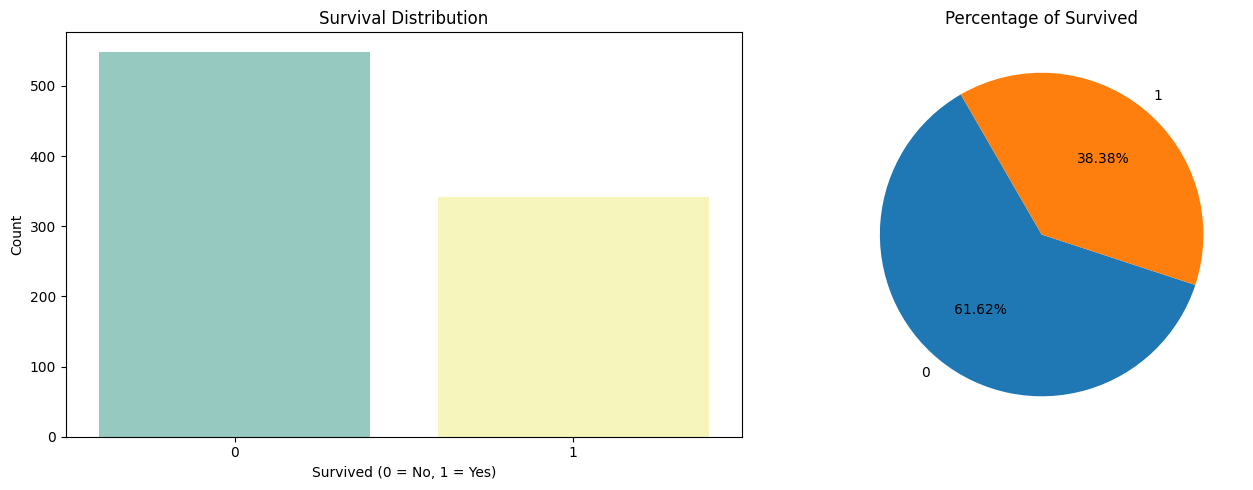

In [31]:
# Survival distribution
# Frequency Distribution
print("Frequency Distribution for column Survived: ")
print(df['Survived'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count Plot
sns.countplot(ax=axes[0], x='Survived', data=df, palette='Set3', hue='Survived', legend=False)
axes[0].set_title('Survival Distribution')
axes[0].set_xlabel('Survived (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')

# Pie Chart
axes[1].pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, 
            autopct="%1.2f%%", startangle=120)
axes[1].set_title("Percentage of Survived")

plt.tight_layout()
plt.show()

#### Survival Status Analysis

The survival status of passengers reveals a **significant imbalance** between survivors and non-survivors. 

- **Non-survivors**: Approximately **549 individuals** did not survive.
- **Survivors**: Around **342 individuals** survived.

This imbalance indicates a **high rate of non-survival**

Frequency Distribution for column Sex: 
Sex
male      577
female    314
Name: count, dtype: int64


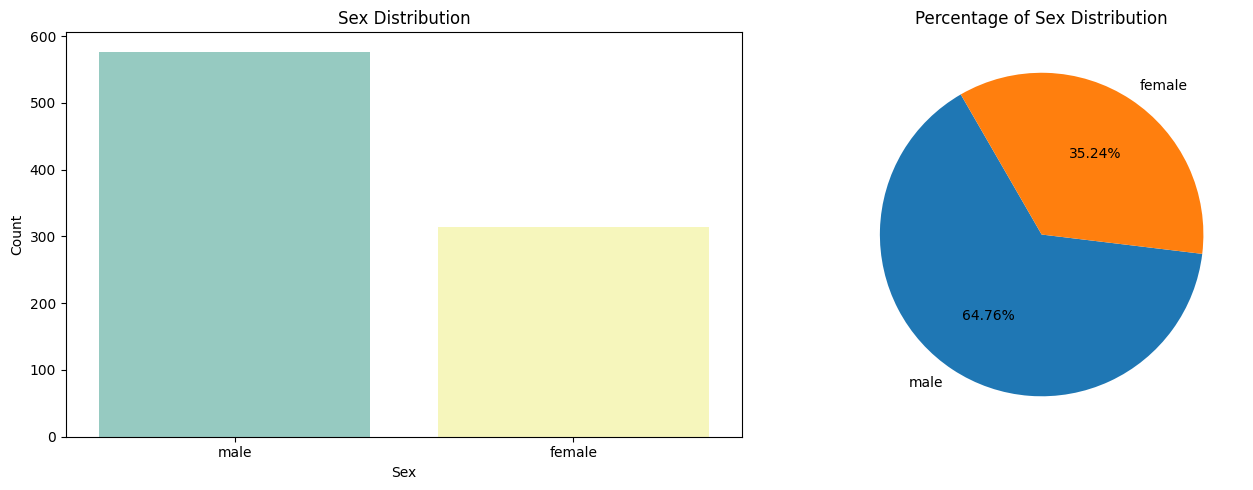

In [32]:
# Sex Distribution
# Frequency Distribution
print("Frequency Distribution for column Sex: ")
print(df['Sex'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar Plot
sns.countplot(ax=axes[0], x='Sex', data=df, palette='Set3', hue='Sex', legend=False)
axes[0].set_title('Sex Distribution')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Pie Chart
axes[1].pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, 
            autopct="%1.2f%%", startangle=120)
axes[1].set_title("Percentage of Sex Distribution")

plt.tight_layout()
plt.show()

#### Gender Distribution Analysis

The bar chart highlights a **notable gender imbalance**, with **males significantly outnumbering females** in the dataset.

- **Males**: Approximately **577 individuals** are represented.
- **Females**: Around **314 individuals** are represented.

Frequency Distribution for column Pclass: 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


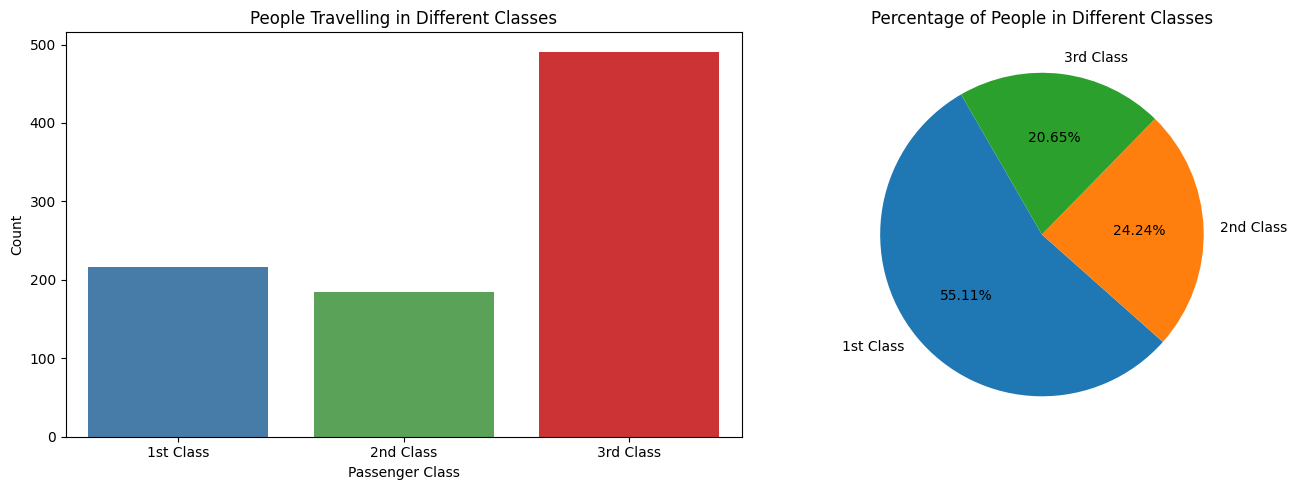

In [33]:
# Pclass Distribution
# Frequency Distribution
print("Frequency Distribution for column Pclass: ")
print(df['Pclass'].value_counts())

# Mapping numerical class values to labels
class_labels = {1: '1st Class', 2: '2nd Class', 3: '3rd Class'}
df['Pclass_Labeled'] = df['Pclass'].map(class_labels)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar Plot
sns.countplot(ax=axes[0], x='Pclass_Labeled', data=df, palette='Set1', 
              order=['1st Class', '2nd Class', '3rd Class'], hue='Pclass_Labeled', legend=False)
axes[0].set_title('People Travelling in Different Classes')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Count')

# Pie Chart
axes[1].pie(df['Pclass'].value_counts(), labels=['1st Class', '2nd Class', '3rd Class'], 
            autopct="%1.2f%%", startangle=120)
axes[1].set_title("Percentage of People in Different Classes")

plt.tight_layout()
plt.show()

#### Passenger Class Distribution

The chart shows a **significant disparity** in passenger class distribution, with a clear dominance of **3rd class passengers**.

- **3rd Class**: Approximately **490 passengers** traveled in 3rd class.
- **1st Class**: Around **220 passengers** traveled in 1st class.
- **2nd Class**: Around **180 passengers** traveled in 2nd class.

Frequency Distribution for column Embarked: 
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


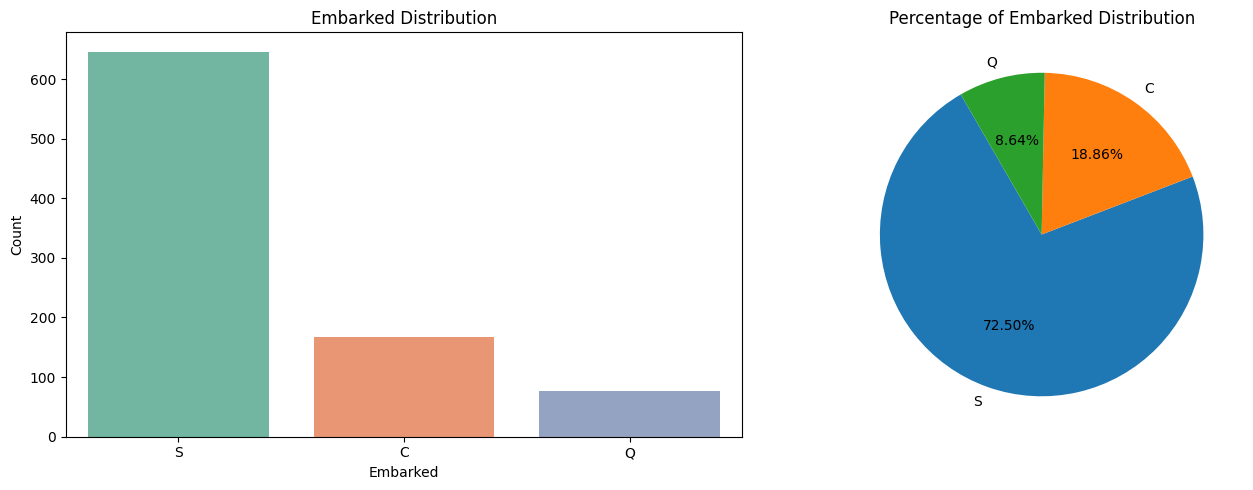

In [34]:
# Embarked Distribution
# Frequency Distribution
print("Frequency Distribution for column Embarked: ")
print(df['Embarked'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar Plot
sns.countplot(ax=axes[0], x='Embarked', data=df, palette='Set2', hue='Embarked', legend=False)
axes[0].set_title('Embarked Distribution')
axes[0].set_xlabel('Embarked')
axes[0].set_ylabel('Count')

# Pie Chart
axes[1].pie(df['Embarked'].value_counts(), labels=df['Embarked'].value_counts().index, 
            autopct="%1.2f%%", startangle=120)
axes[1].set_title("Percentage of Embarked Distribution")

plt.tight_layout()
plt.show()

#### Embarkation Port Distribution

The distribution of embarkation ports shows a **strong preference for Southampton (S)** as the primary boarding location.

- **Southampton (S)**: Approximately **640 passengers** boarded here.
- **Cherbourg (C)**: Around **160 passengers** boarded in Cherbourg.
- **Queenstown (Q)**: Approximately **80 passengers** boarded in Queenstown.

This data highlights that **Southampton** was the dominant embarkation point for passengers, with **Cherbourg** and **Queenstown** having significantly fewer passengers.


## 4.2  Bivariate Analysis (Two-Variable Exploration)

### Correlation Matrix (Numerical Variables)

In [35]:
plt.figure(figsize=(8,6))
# Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix to visualize the relationship between numerical columns:")
print()
print(correlation_matrix)

Correlation Matrix to visualize the relationship between numerical columns:

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.059900 -0.021052  0.083471  0.317430
Pclass   -0.338481  1.000000 -0.342061  0.074633  0.017445 -0.715300
Age      -0.059900 -0.342061  1.000000 -0.269262 -0.179512  0.146042
SibSp    -0.021052  0.074633 -0.269262  1.000000  0.427536  0.329376
Parch     0.083471  0.017445 -0.179512  0.427536  1.000000  0.293672
Fare      0.317430 -0.715300  0.146042  0.329376  0.293672  1.000000


<Figure size 800x600 with 0 Axes>

#### Key Insights from the Correlation Matrix

The correlation matrix reveals several key relationships between the numerical variables in the Titanic dataset:

- **Survival & Fare**: A **moderate positive correlation** with fare, indicating that passengers who paid higher fares were more likely to survive.
- **Survival & Pclass**: A **moderate negative correlation** with Pclass, meaning passengers in higher classes had a greater chance of survival.
- **Pclass & Fare**: A **strong negative correlation** between Pclass and fare, reflecting that higher classes paid more.

Further relationships observed in the matrix include:

- **Age & Family Size**: Age shows a **weak negative correlation** with both **SibSp** and **Parch**, suggesting a slight tendency for older passengers to have fewer family members onboard.
- **SibSp & Parch**: A **moderate positive correlation** between SibSp and Parch, indicating that passengers with more siblings/spouses also tended to have more parents/children.
- **Fare & Family Size**: In the Titanic dataset, the fare for each passenger seems to be **the total fare for the entire family** rather than an individual fare, which might be a **data recording error**.   
  - This results in a **moderate positive correlation** between **Fare** and **family size (SibSp & Parch)**, as larger families appear to have paid higher fares.


Overall, the matrix highlights the interconnectedness of **passenger class**, **fare**, **family size**, and **survival outcomes**.


### Scatter plots for continuous variable relationships (Numerical Vs Numerical)

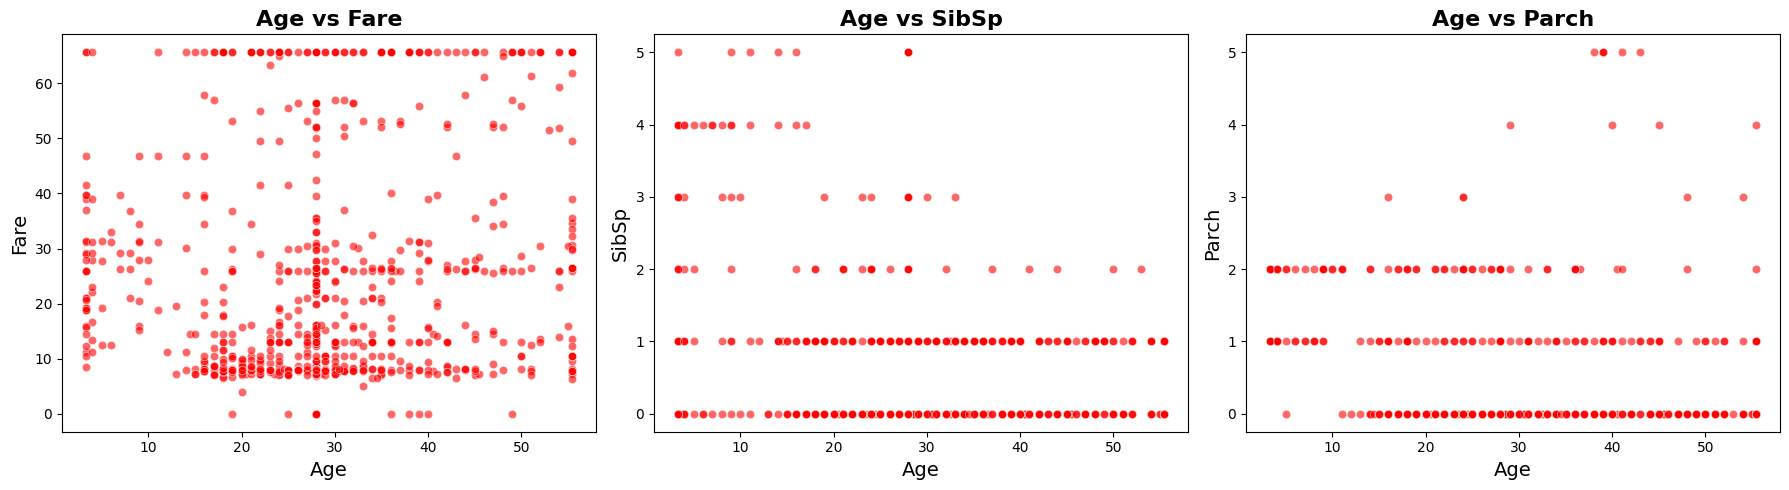

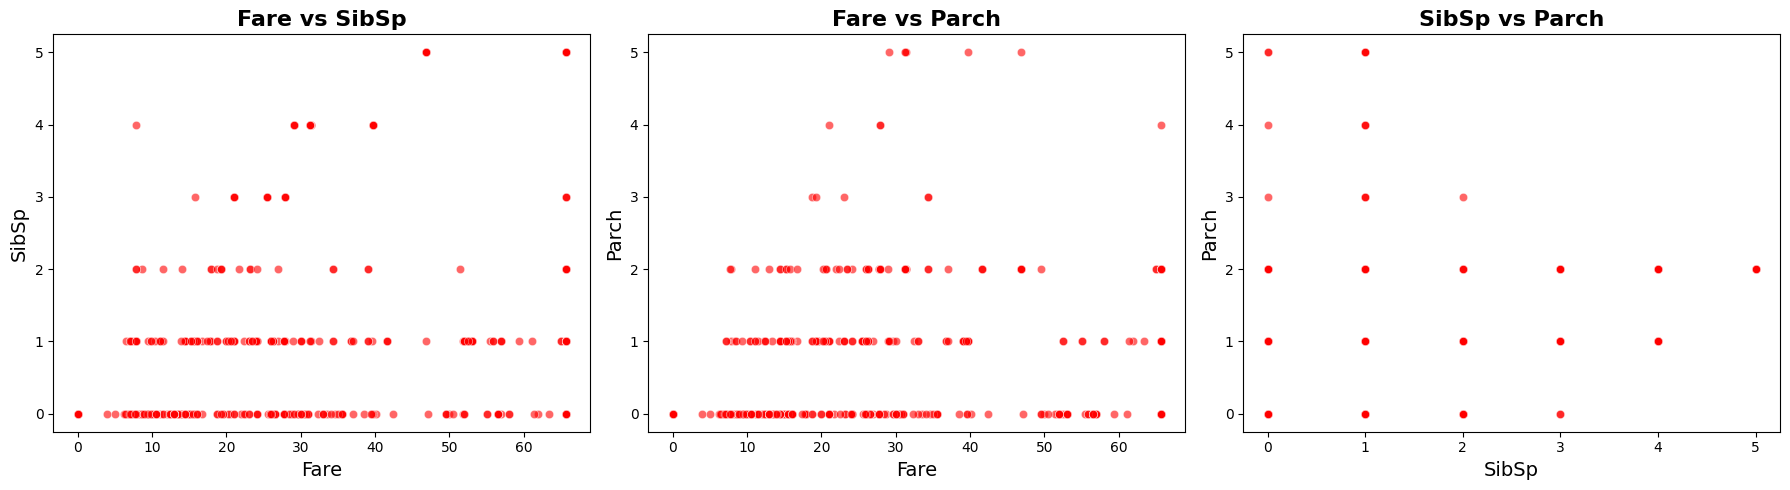

In [36]:
plots_per_row = 3

pairs = []
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        pairs.append((numerical_columns[i], numerical_columns[j]))

for idx in range(0, len(pairs), plots_per_row):
    fig, axes = plt.subplots(1, min(plots_per_row, len(pairs) - idx), figsize=(18, 5))
    if min(plots_per_row, len(pairs) - idx) == 1:
        axes = [axes]
    for ax, (x_col, y_col) in zip(axes, pairs[idx:idx + plots_per_row]):
        sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.6, color='r', ax=ax)
        ax.set_title(f"{x_col} vs {y_col}", fontsize=16, fontweight='bold')
        ax.set_xlabel(x_col, fontsize=14)
        ax.set_ylabel(y_col, fontsize=14)
    plt.tight_layout()
    plt.show()

#### 1. Age vs. Fare

The scatter plot of **Age vs. Fare** shows a **weak positive relationship**. While there's a slight tendency for fare to increase with age, the correlation is not strong, and there’s significant scatter in the data. Many passengers across various age groups paid similar fares. The plot suggests that **age alone is not a strong predictor of fare price**.

---

#### 2. Age vs. SibSp

The scatter plot of **Age vs. SibSp** reveals that most passengers, regardless of age, traveled **alone** (SibSp = 0). While there's a slight tendency for older passengers to have fewer siblings/spouses onboard, this trend is weak. 

---

#### 3. Age vs. Parch

The scatter plot of **Age vs. Parch** shows that most passengers, regardless of age, traveled **without parents or children** (Parch = 0). There's a slight tendency for older passengers to have fewer parents/children onboard, but this trend is weak. **Children under 10** were more likely to have higher Parch values (traveling with parents).

---

#### 4. Fare vs. SibSp

The scatter plot of **Fare vs. SibSp** shows that most passengers, regardless of fare, traveled **alone** (SibSp = 0). There's a slight tendency for passengers with higher SibSp values to have paid higher fares, but this trend is not strong. The plot highlights the **discrete nature** of the SibSp variable with its **horizontal bands** of points.

---

#### 5. Fare vs. Parch

The scatter plot of **Fare vs. Parch** shows that most passengers, regardless of fare, traveled **without parents or children** (Parch = 0). There's a slight tendency for passengers with higher Parch values to have paid higher fares, but this trend is not strong. The plot highlights the **discrete nature** of the Parch variable with its **horizontal bands** of points.

---

#### 6. SibSp vs. Parch

The scatter plot of **SibSp vs. Parch** shows a **moderate positive correlation** between **SibSp** (siblings/spouses) and **Parch** (parents/children). Passengers with more siblings/spouses tend to have more parents/children aboard. The plot also highlights the **discrete nature** of both variables, with clear clusters of points representing the whole number counts of family members.


### Categorical vs. Numerical Variables
- We will generate bar plots, violin plots, and box plots for all possible combinations of categorical and numerical variables.

#### AGE vs CATEGORICAL VARIABLES

##### Age vs Sex

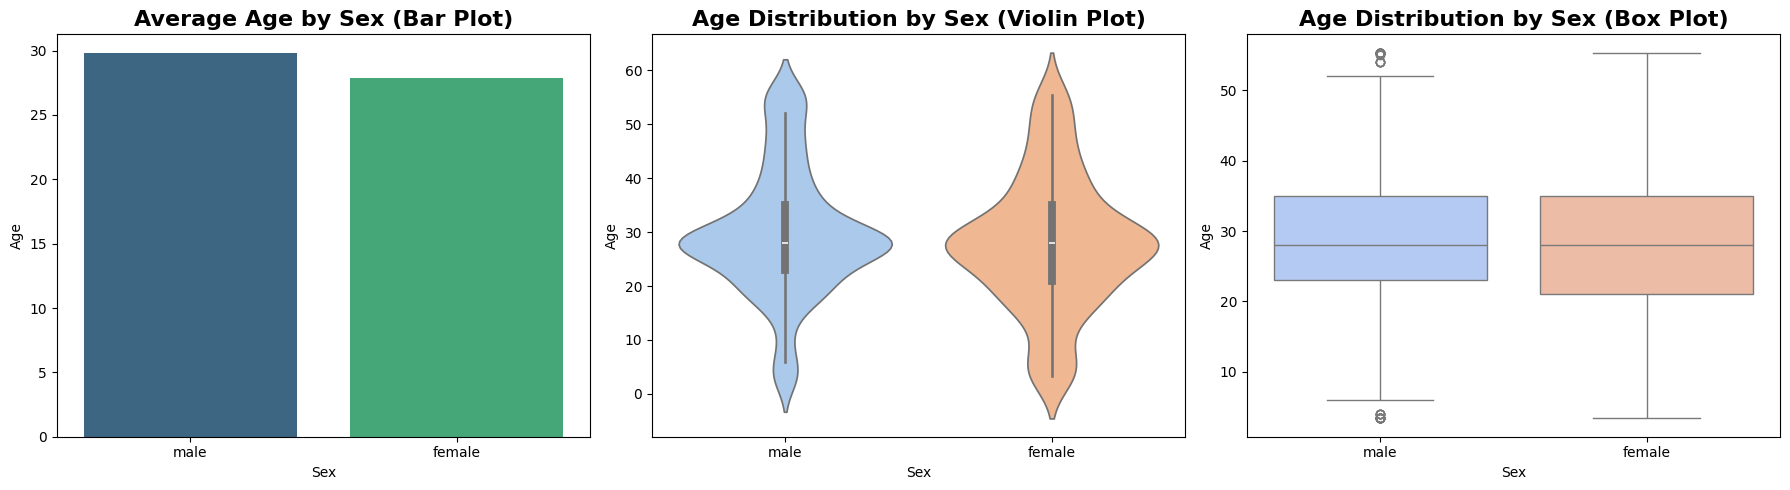

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar Plot
sns.barplot(ax=axes[0], data=df, x="Sex", y="Age", errorbar=None, palette="viridis", hue="Sex", legend=False)
axes[0].set_title("Average Age by Sex (Bar Plot)", fontsize=16, fontweight='bold')

# Violin Plot
sns.violinplot(ax=axes[1], data=df, x="Sex", y="Age", palette="pastel", hue="Sex", legend=False)
axes[1].set_title("Age Distribution by Sex (Violin Plot)", fontsize=16, fontweight='bold')

# Box Plot
sns.boxplot(ax=axes[2], data=df, x="Sex", y="Age", palette="coolwarm", hue="Sex", legend=False)
axes[2].set_title("Age Distribution by Sex (Box Plot)", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### 1. Bar Plots

The **bar plots** show a slightly higher **average age** for males (around **30**) compared to females (around **28**). However, this difference is minimal.

---

#### 2. Violin Plots

The **violin plots** reveal that the overall shapes of the **age distributions** for both males and females are quite alike, with both skewed towards younger ages. This indicates that the slight difference in **average age** isn't a major factor in the overall **age patterns**.

---

#### 3. Box Plots

The **box plots** provide more specific details about the spread and **median** of ages. They confirm that the **median age** for both males and females is around **30**, but highlight a difference in **variability**. Males have a **wider range of ages**, with some outliers at both younger and older ages, while females have a more **concentrated age distribution**.


##### Age vs Embarked

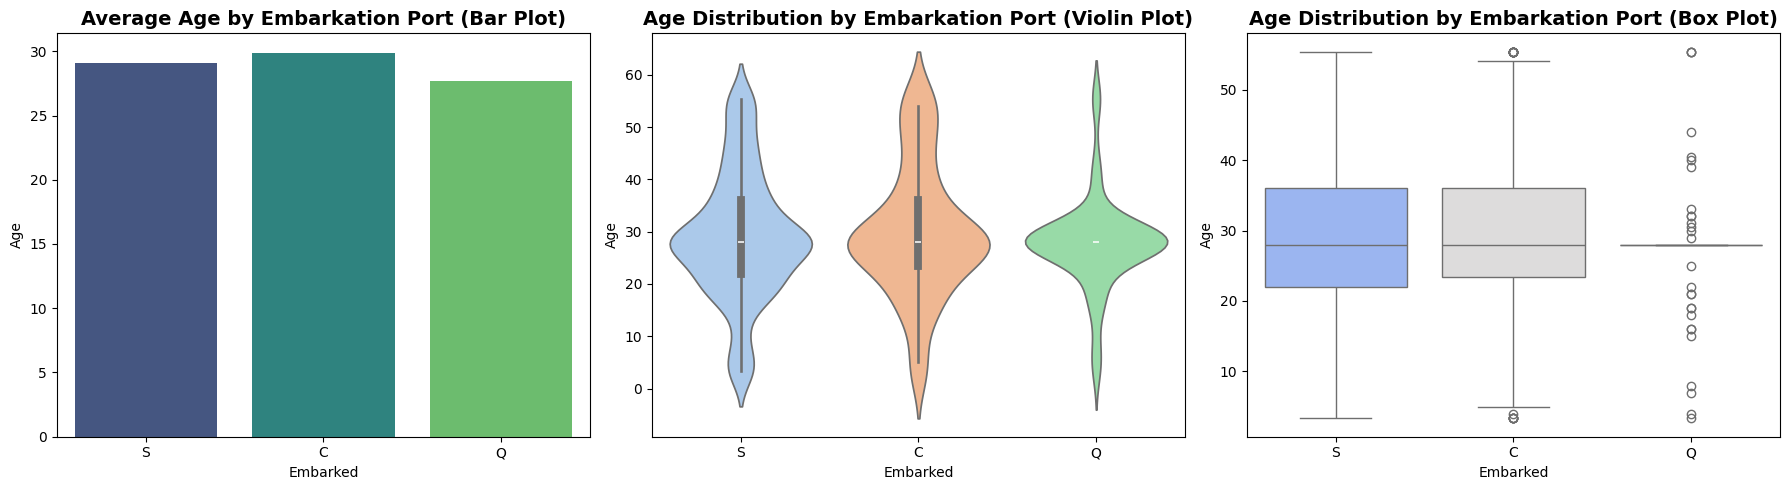

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar Plot
sns.barplot(ax=axes[0], data=df, x="Embarked", y="Age", errorbar=None, palette="viridis", hue="Embarked", legend=False)
axes[0].set_title("Average Age by Embarkation Port (Bar Plot)", fontsize=14, fontweight='bold')

# Violin Plot
sns.violinplot(ax=axes[1], data=df, x="Embarked", y="Age", palette="pastel", hue="Embarked", legend=False)
axes[1].set_title("Age Distribution by Embarkation Port (Violin Plot)", fontsize=14, fontweight='bold')

# Box Plot
sns.boxplot(ax=axes[2], data=df, x="Embarked", y="Age", palette="coolwarm", hue="Embarked", legend=False)
axes[2].set_title("Age Distribution by Embarkation Port (Box Plot)",  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 1. Bar Plot

The **bar plot** shows that the **average age** of passengers varies by **embarkation port**, with those from **Cherbourg** being the oldest on average and those from **Queenstown** being the youngest.

---

#### 2. Violin Plot

The **violin plot** provides a deeper look at the **age distribution**, revealing that while **Southampton** and **Cherbourg** have a **wider spread** of ages, **Queenstown** has a **narrower range**, with fewer older passengers.

---

#### 3. Box Plot

The **box plot** further confirms this trend, highlighting that the **median age** is similar for **Southampton** and **Cherbourg**, while **Queenstown** has a slightly **lower median** with some older outliers.

---

### Overall Insight

Overall, the data suggests that passengers from **Queenstown** were generally **younger**, whereas **Cherbourg** had a relatively **older demographic**.


##### Age vs Survived

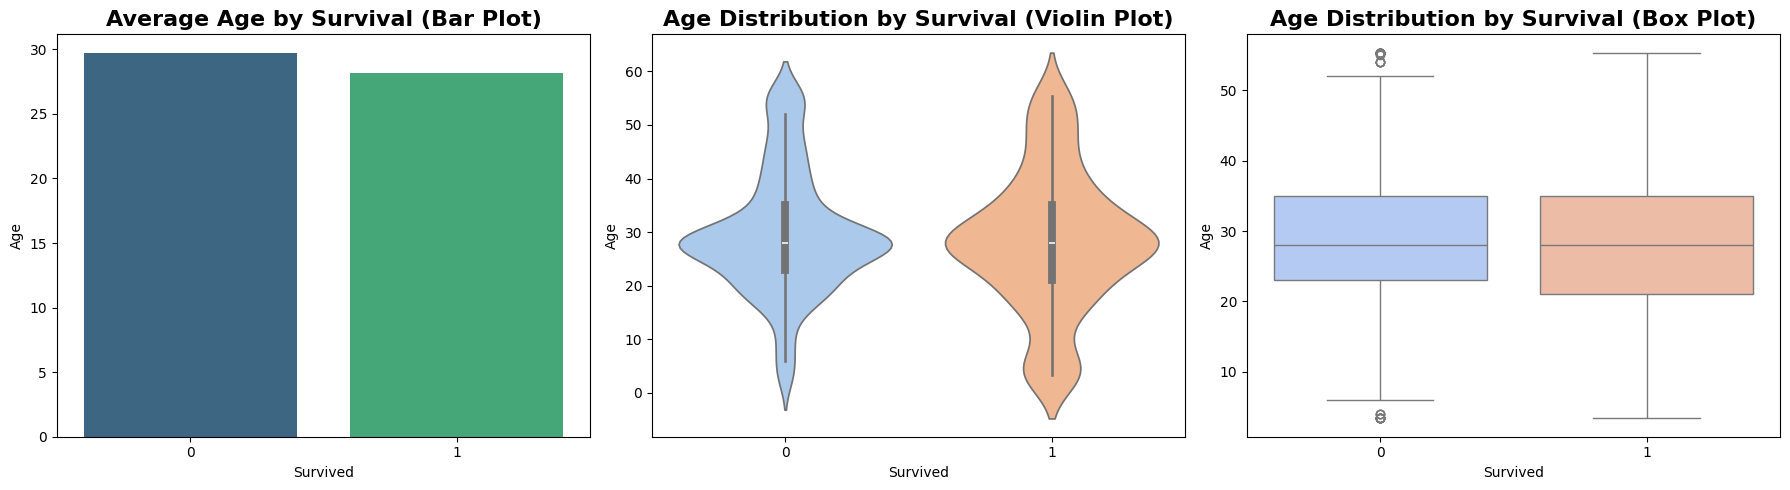

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar Plot
sns.barplot(ax=axes[0], data=df, x="Survived", y="Age", errorbar=None, palette="viridis", hue="Survived", legend=False)
axes[0].set_title("Average Age by Survival (Bar Plot)", fontsize=16, fontweight='bold')

# Violin Plot
sns.violinplot(ax=axes[1], data=df, x="Survived", y="Age", palette="pastel", hue="Survived", legend=False)
axes[1].set_title("Age Distribution by Survival (Violin Plot)", fontsize=16, fontweight='bold')

# Box Plot
sns.boxplot(ax=axes[2], data=df, x="Survived", y="Age", palette="coolwarm", hue="Survived", legend=False)
axes[2].set_title("Age Distribution by Survival (Box Plot)", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### 1. Bar Plot

The **bar plot** shows that the **average age** of **survivors** is slightly lower than that of **non-survivors**.

---

#### 2. Violin Plot

The **violin plot** reveals a **wider age distribution**, with more younger individuals in both groups.

---

#### 3. Box Plot

The **box plot** highlights similar **median ages** but shows that **non-survivors** have more older individuals and some **outliers**.

---

### Overall Insight

**Age** influences survival but is not the only factor.


### For all other bivariate analysis (Numerical vs Categorical)

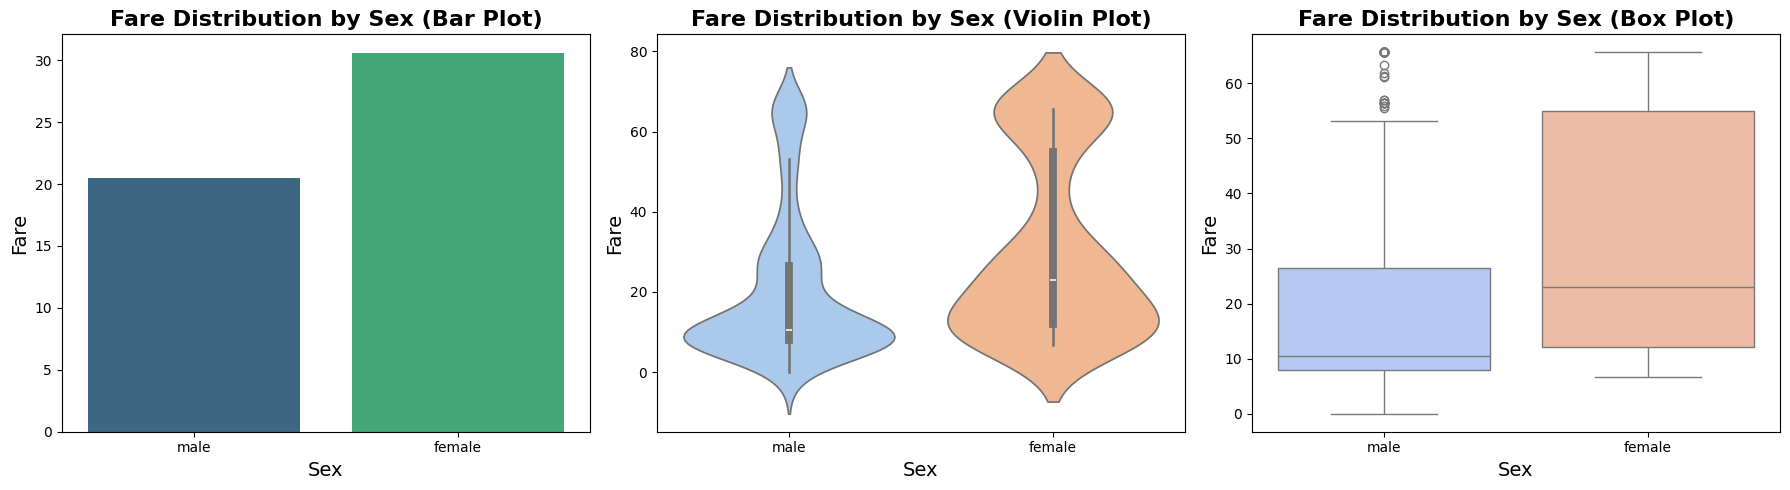

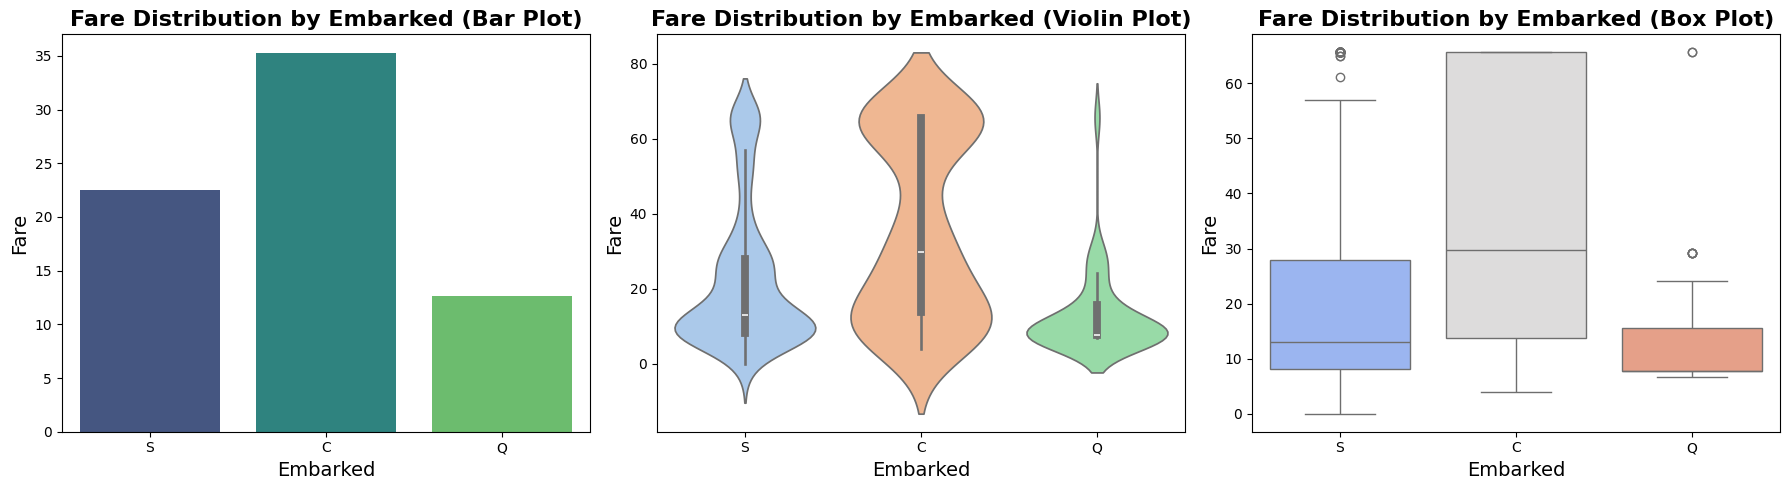

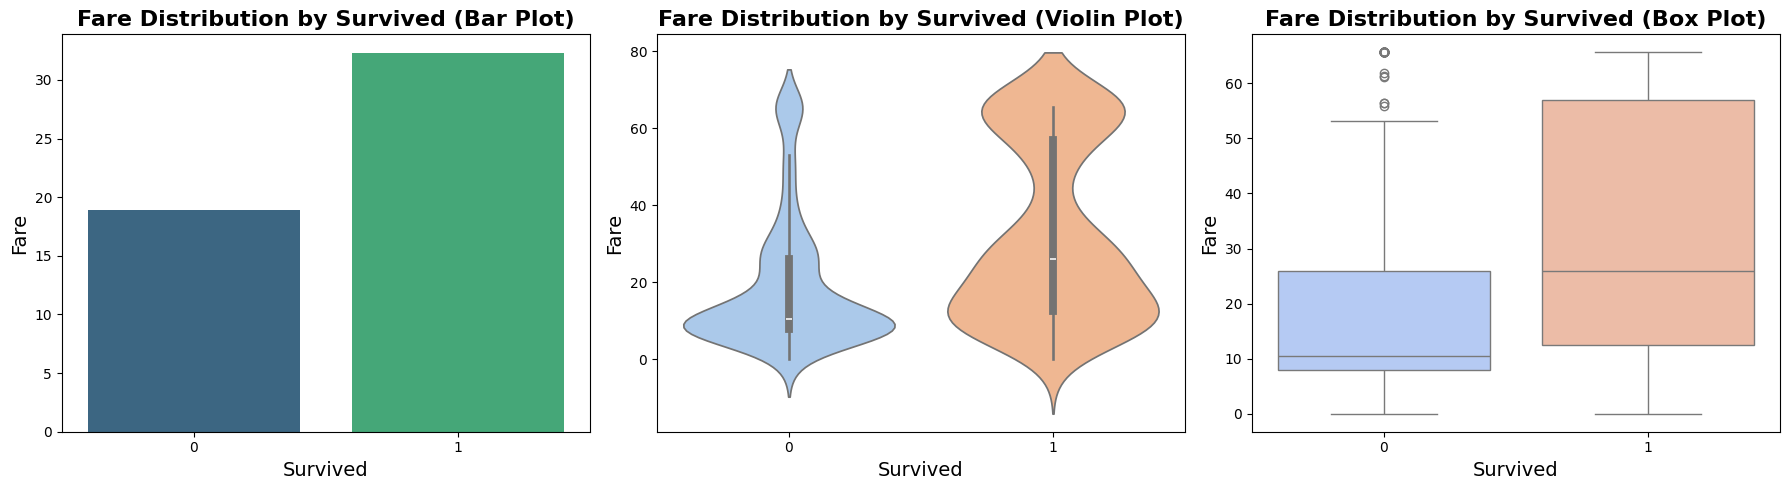

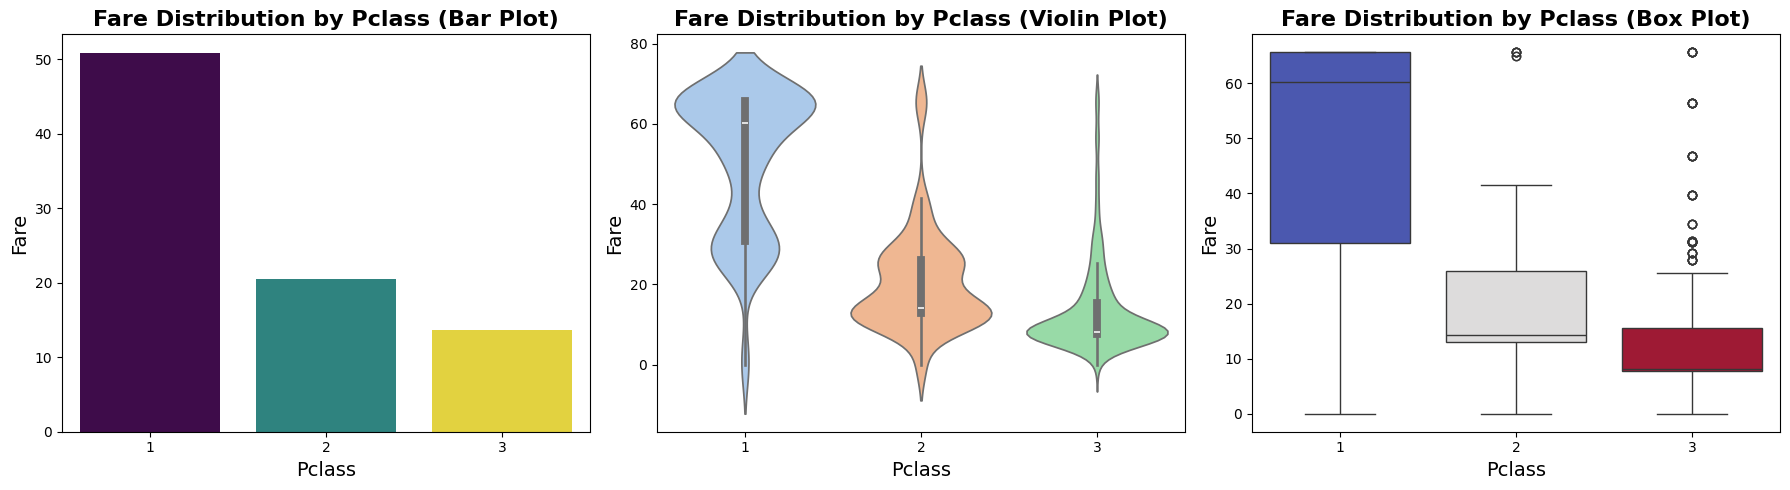

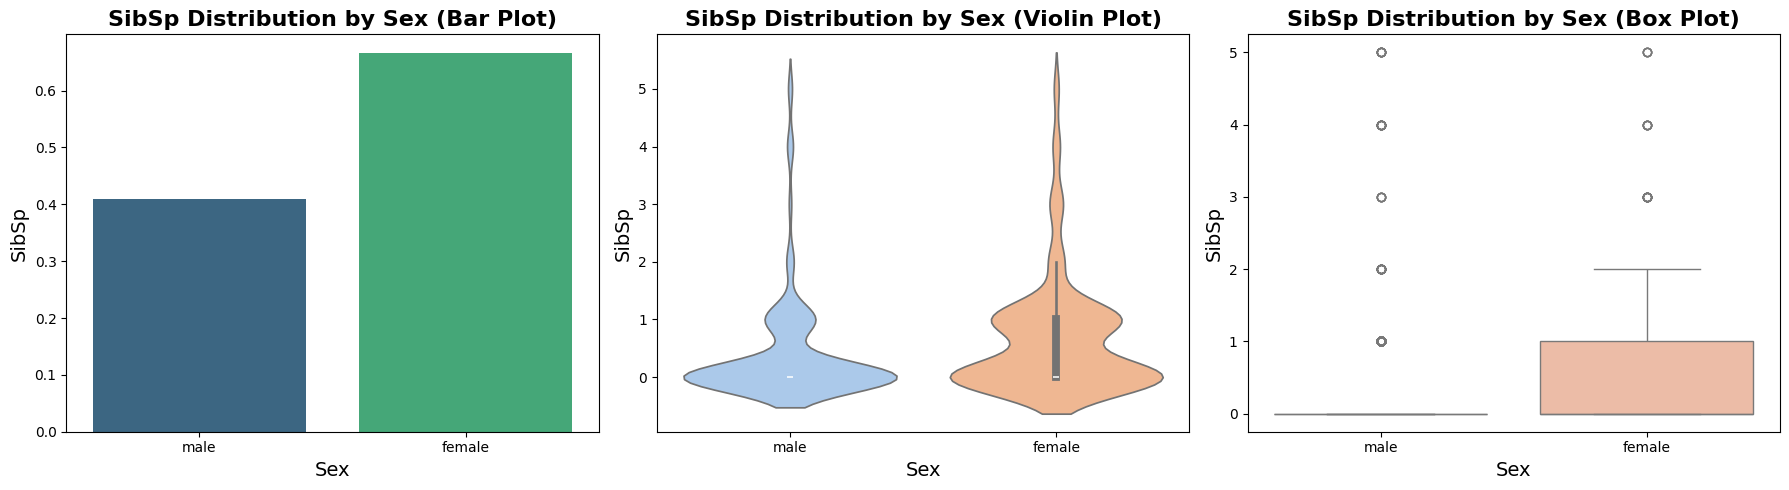

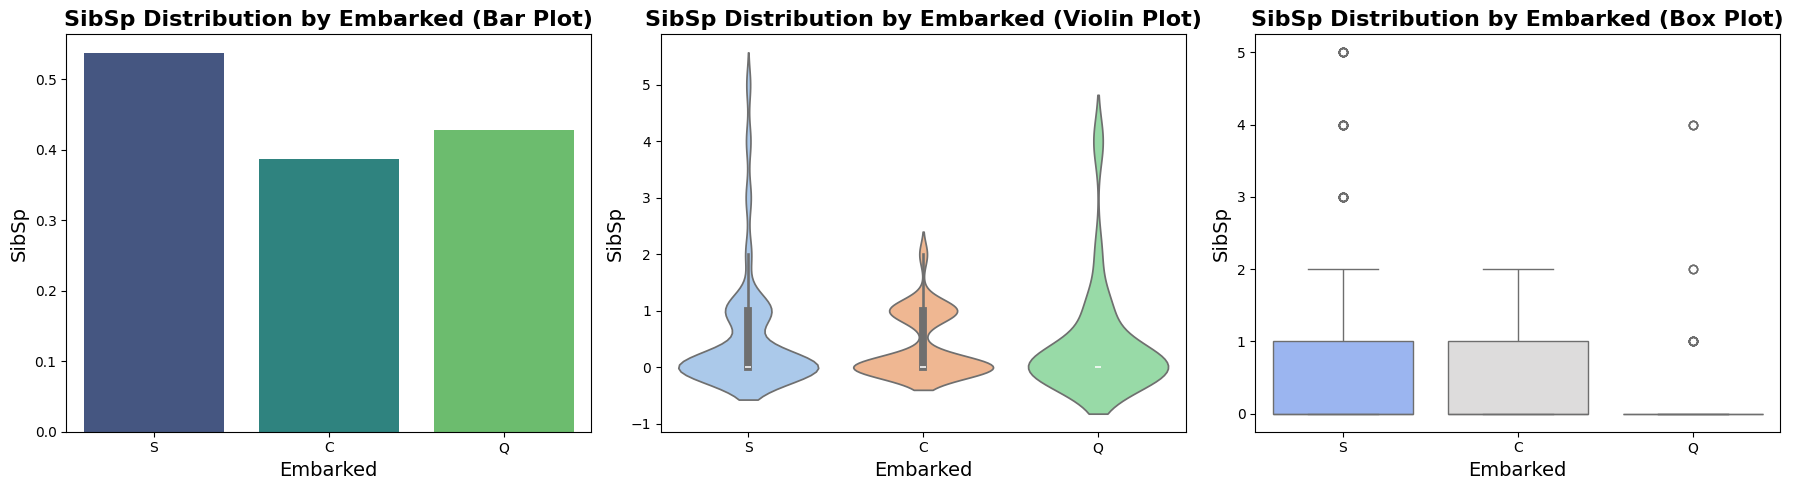

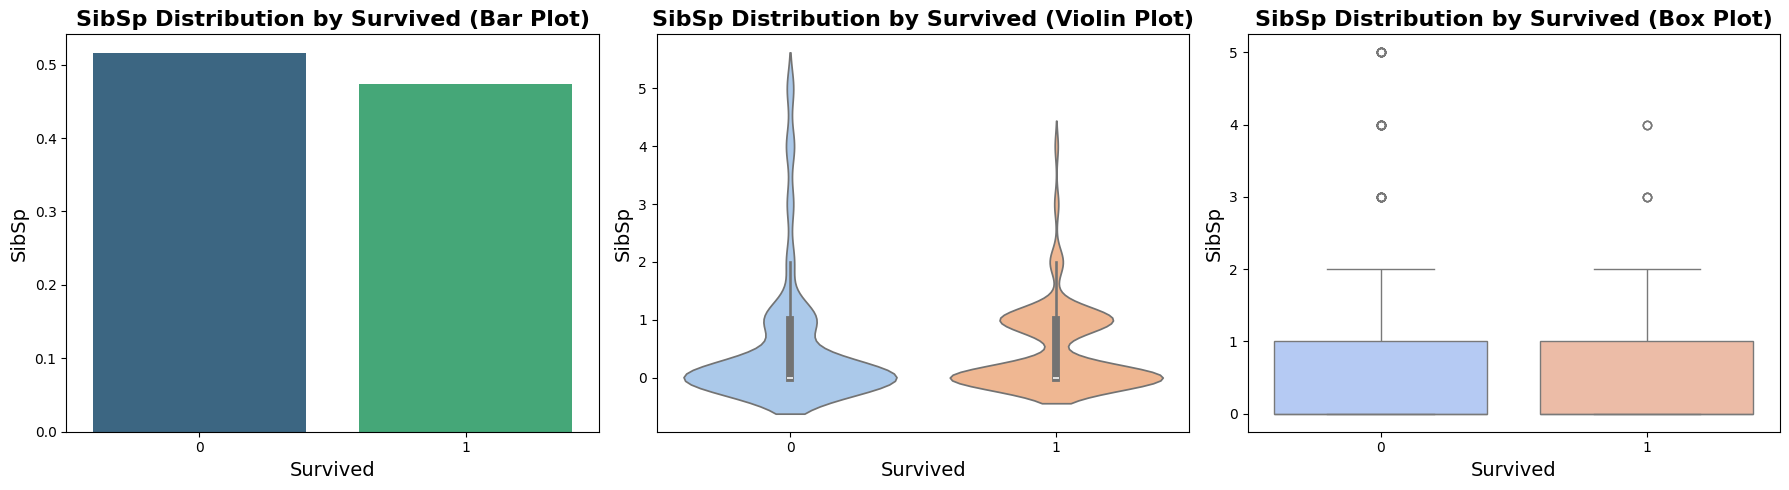

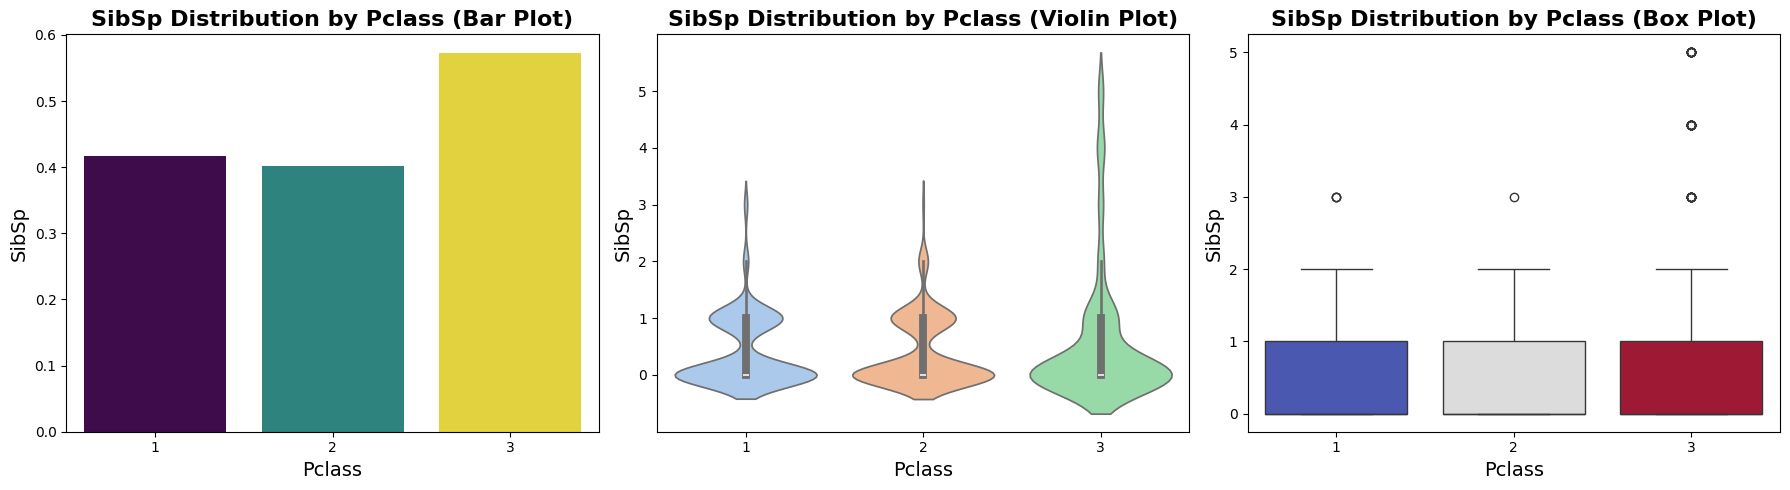

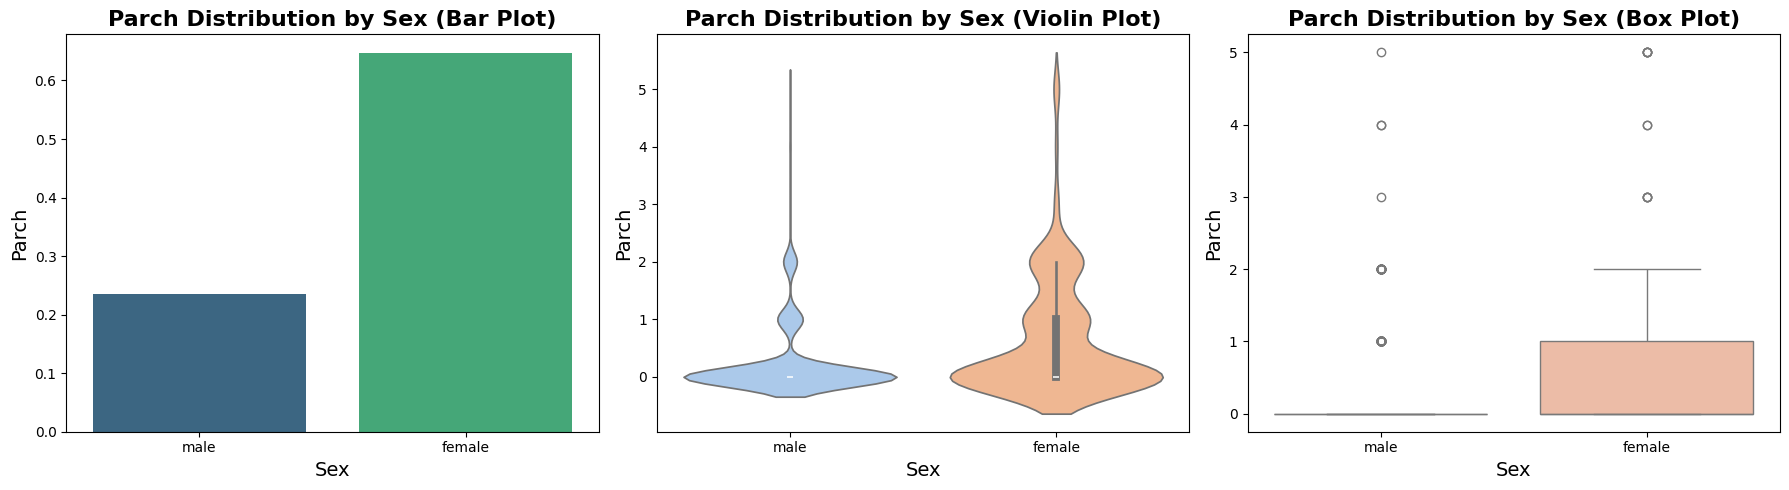

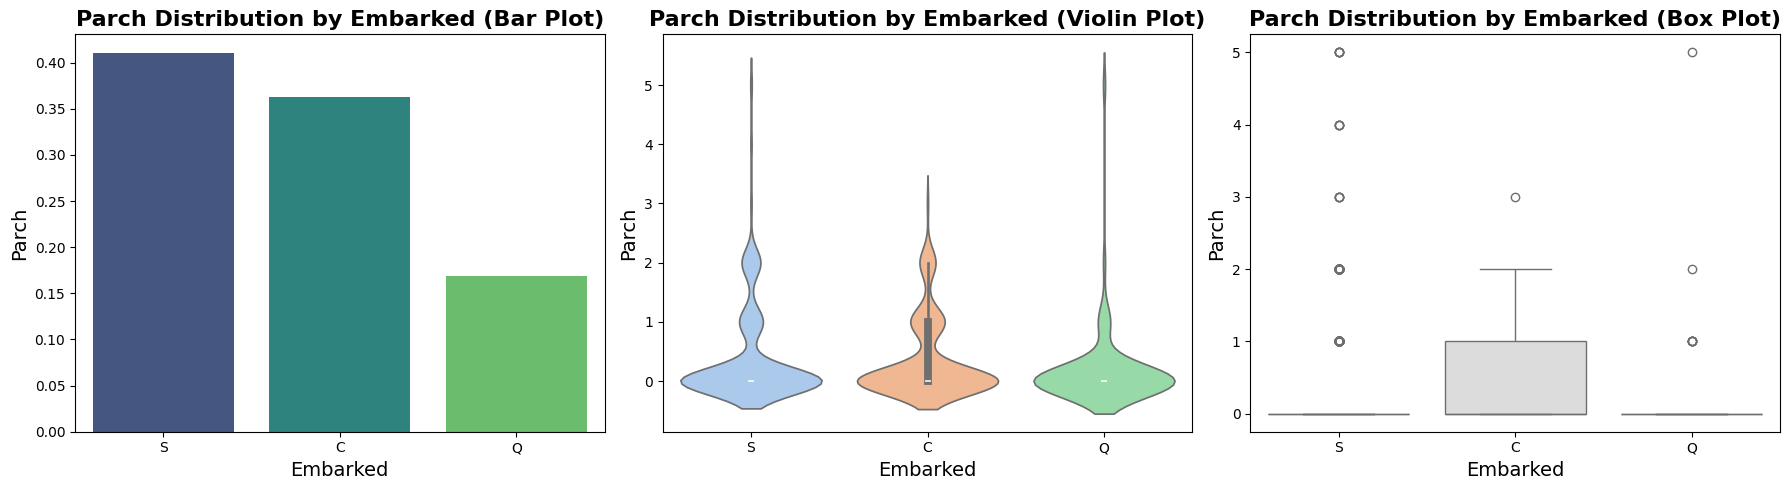

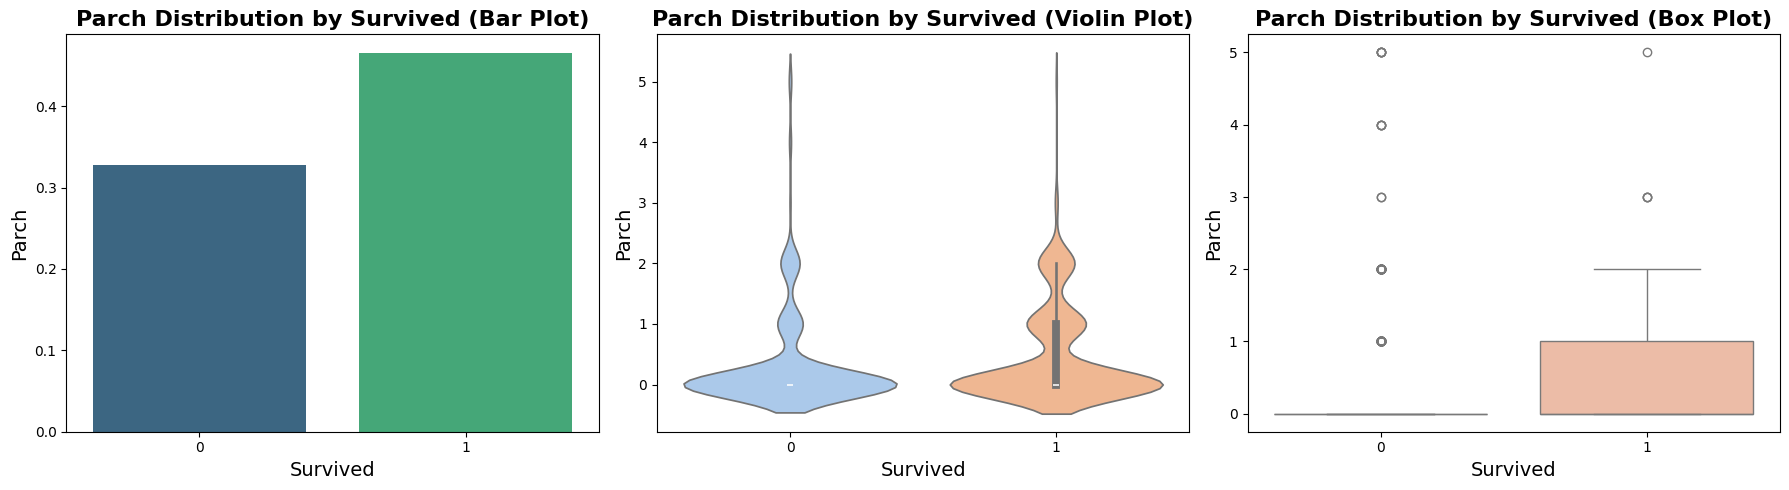

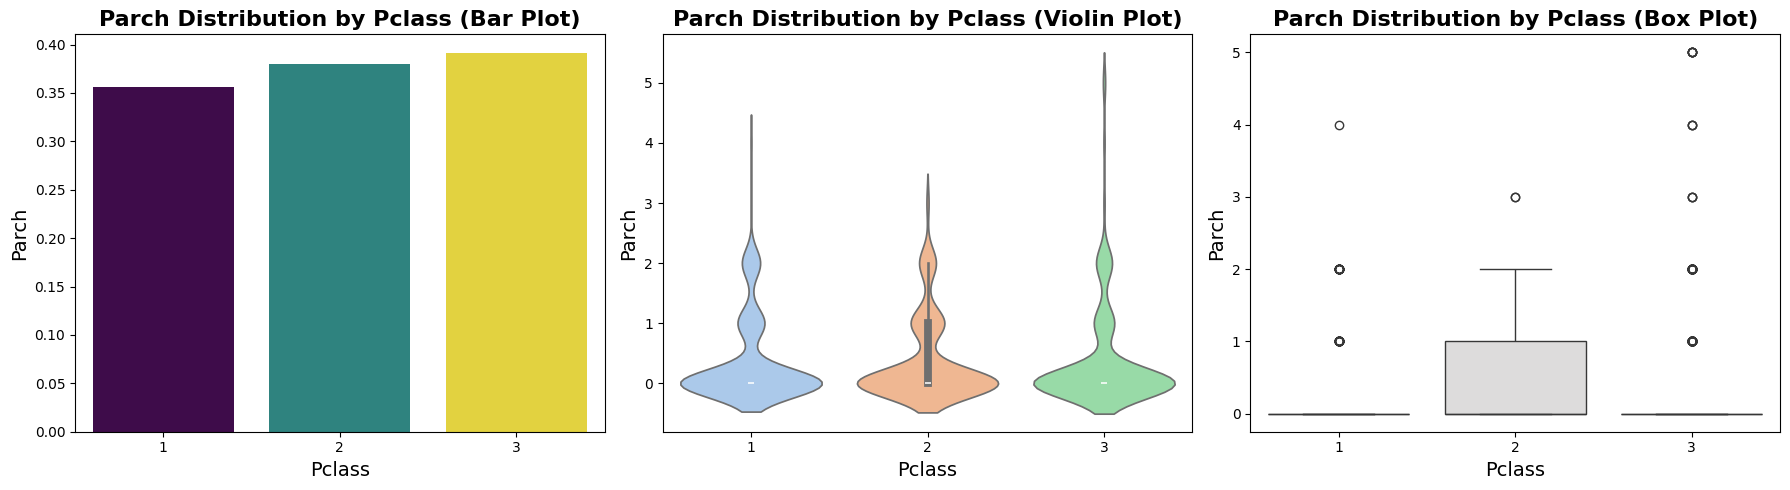

In [40]:
for num_col in numerical_columns:
    for cat_col in categorical_columns:

        if num_col == "Age":
            continue  # Already done

        # Creating subplots for Bar Plot, Violin Plot, and Box Plot
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Bar Plot
        sns.barplot(ax=axes[0], data=df, x=cat_col, y=num_col, palette="viridis", hue=cat_col, legend=False, errorbar=None)
        axes[0].set_title(f"{num_col} Distribution by {cat_col} (Bar Plot)", fontsize=16, fontweight='bold')
        axes[0].set_xlabel(cat_col, fontsize=14)
        axes[0].set_ylabel(num_col, fontsize=14)

        # Violin Plot
        sns.violinplot(ax=axes[1], data=df, x=cat_col, y=num_col, palette="pastel", hue=cat_col, legend=False)
        axes[1].set_title(f"{num_col} Distribution by {cat_col} (Violin Plot)", fontsize=16, fontweight='bold')
        axes[1].set_xlabel(cat_col, fontsize=14)
        axes[1].set_ylabel(num_col, fontsize=14)

        # Box Plot
        sns.boxplot(ax=axes[2], data=df, x=cat_col, y=num_col, palette="coolwarm", hue=cat_col, legend=False)
        axes[2].set_title(f"{num_col} Distribution by {cat_col} (Box Plot)", fontsize=16, fontweight='bold')
        axes[2].set_xlabel(cat_col, fontsize=14)
        axes[2].set_ylabel(num_col, fontsize=14)

        plt.tight_layout()
        plt.show()

#### Insights from Numerical vs. Categorical Bivariate Analysis
#### 1. Age vs. Survived
-  Survivors tended to be younger on average, implying higher survival rates among younger passengers.
-  Older individuals had slightly lower survival probabilities.
- Infants (ages 0-5) showed higher survival rates, likely due to evacuation priorities.
---
#### 2. Fare vs. Survived
-  Passengers who paid higher fares had a greater likelihood of survival, reflecting the advantage of being in first class.
-  Lower fare-paying passengers faced higher mortality rates, emphasizing the impact of economic class on survival.
---
#### 3. SibSp/Parch vs. Survived
-  Passengers with 1 to 3 family members had better survival odds.
-  Solo travelers had a lower chance of survival.
-  Large families (SibSp/Parch > 4) experienced lower survival rates, possibly due to evacuation challenges.
---
#### 4. Age vs. Pclass
-  First-class passengers had a higher average age.
-  Third-class travelers were generally younger, likely consisting of workers or immigrants.
---
#### 5. Fare vs. Pclass
-  A distinct pattern emerged: first-class tickets were significantly more expensive, while third-class fares were the lowest.
-  Some third-class passengers paid relatively high fares, appearing as outliers.
---
#### Other Numerical vs. Categorical Comparisons
Additional numerical vs. categorical analyses did not reveal strong insights but were still visualized through plots.

### Categorical vs Categorical

 Crosstab for Sex vs Embarked 
Embarked   C   Q    S
Sex                  
female    73  36  205
male      95  41  441




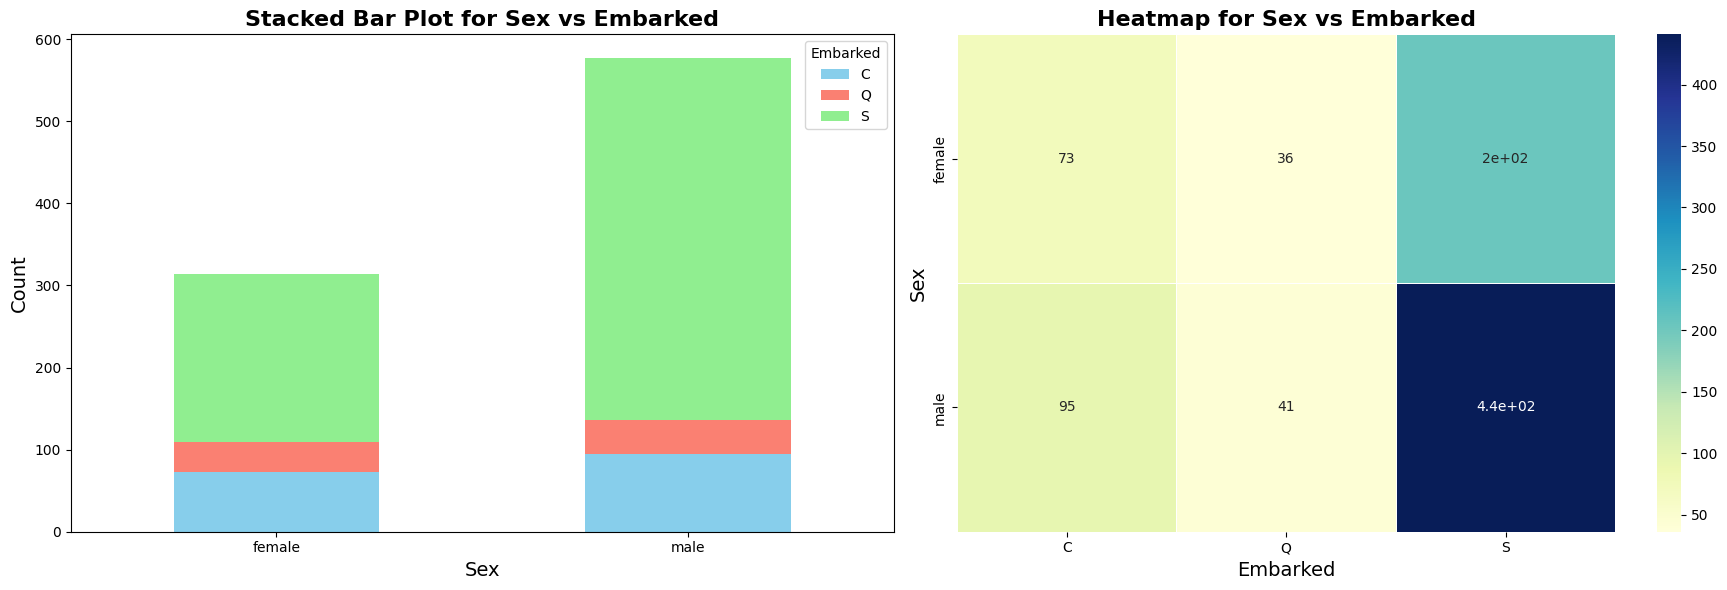

 Crosstab for Sex vs Survived 
Survived    0    1
Sex               
female     81  233
male      468  109




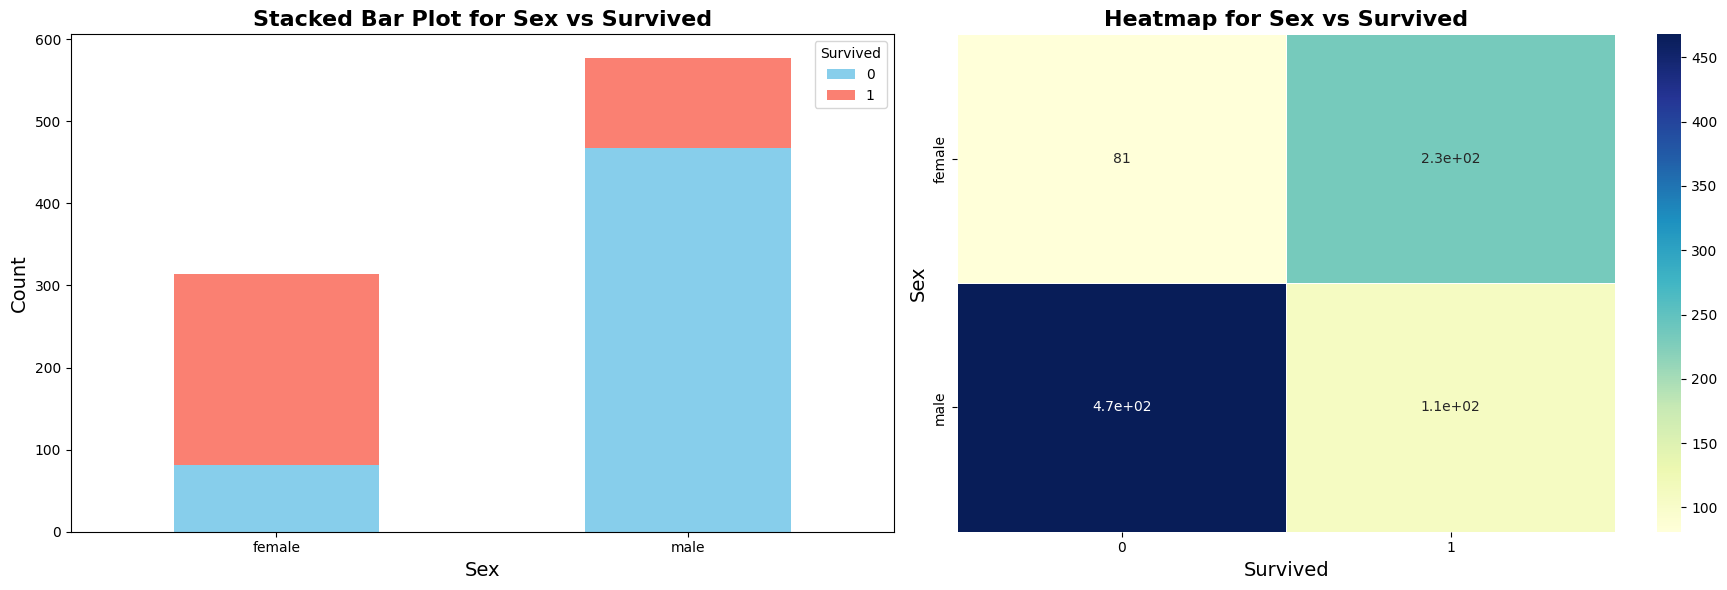

 Crosstab for Sex vs Pclass 
Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347




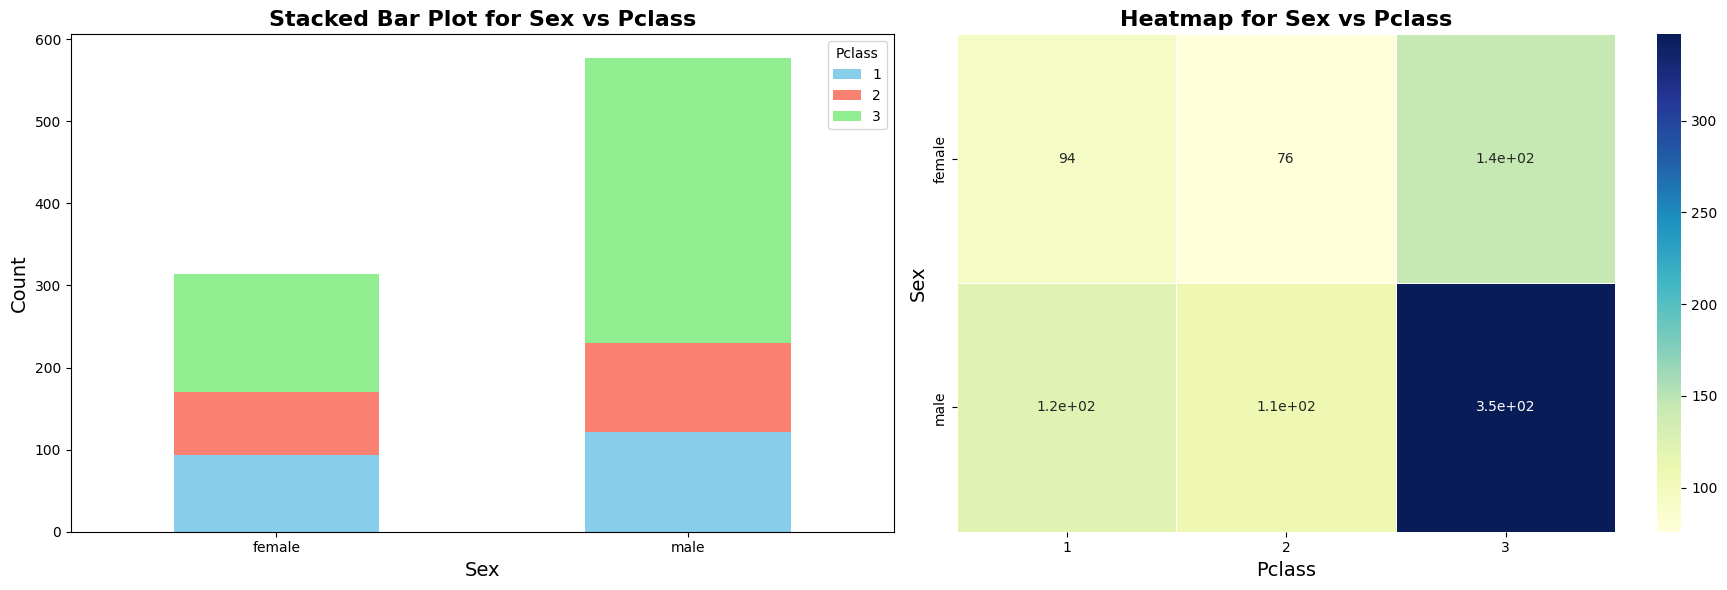

 Crosstab for Embarked vs Survived 
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219




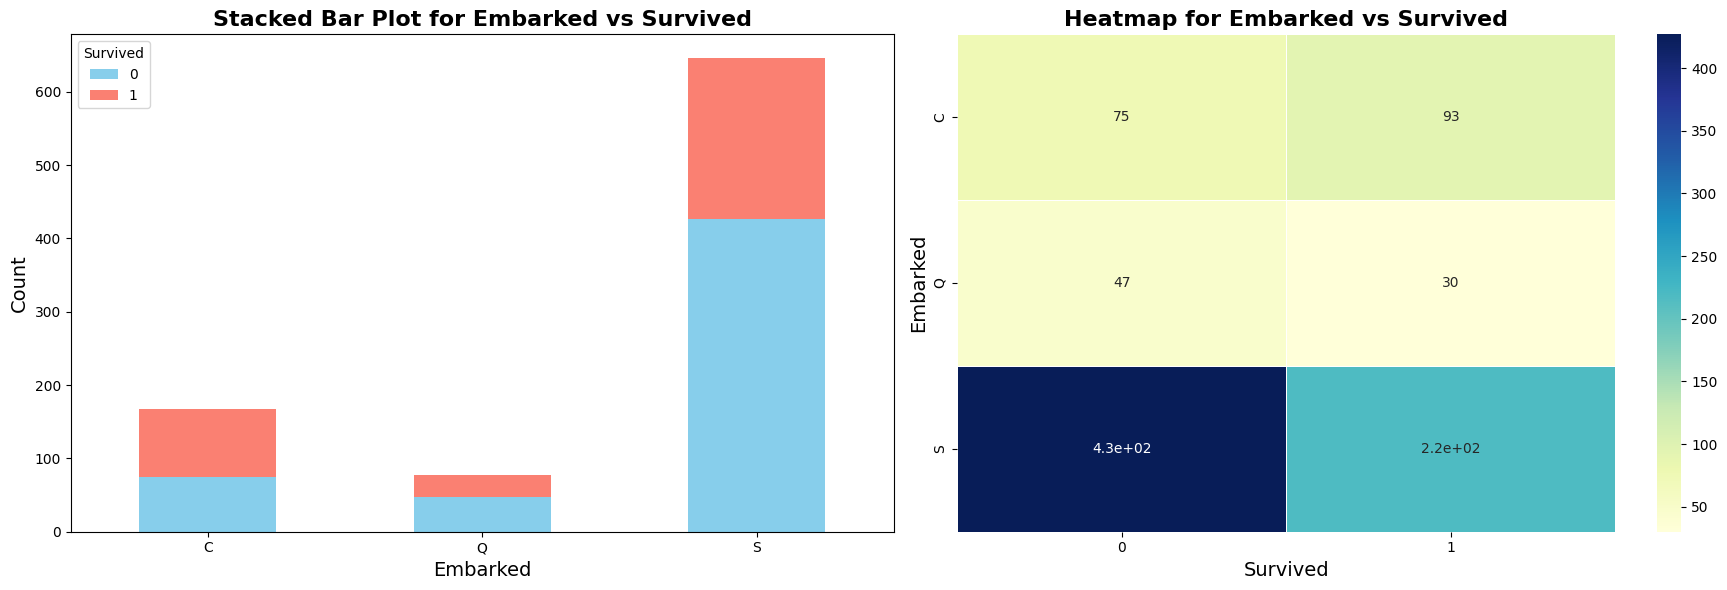

 Crosstab for Embarked vs Pclass 
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         129  164  353




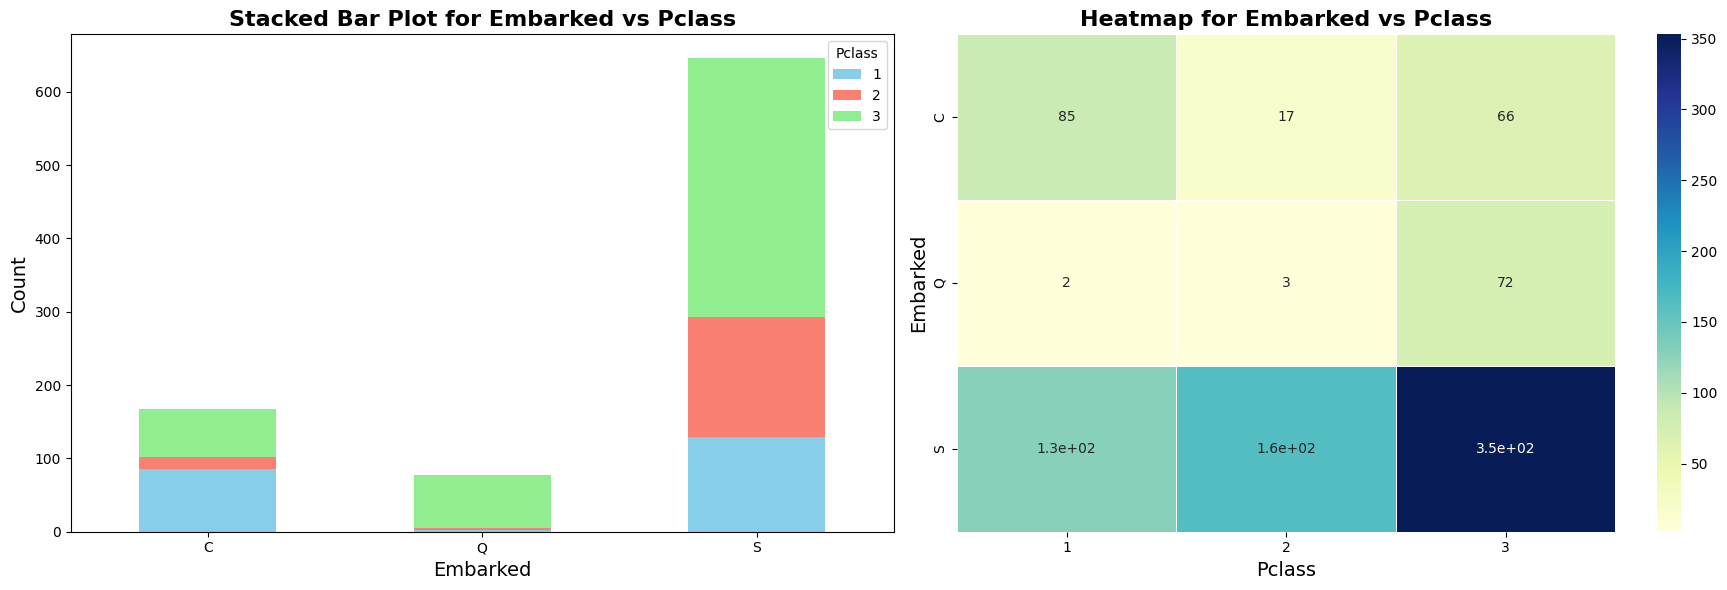

 Crosstab for Survived vs Pclass 
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119




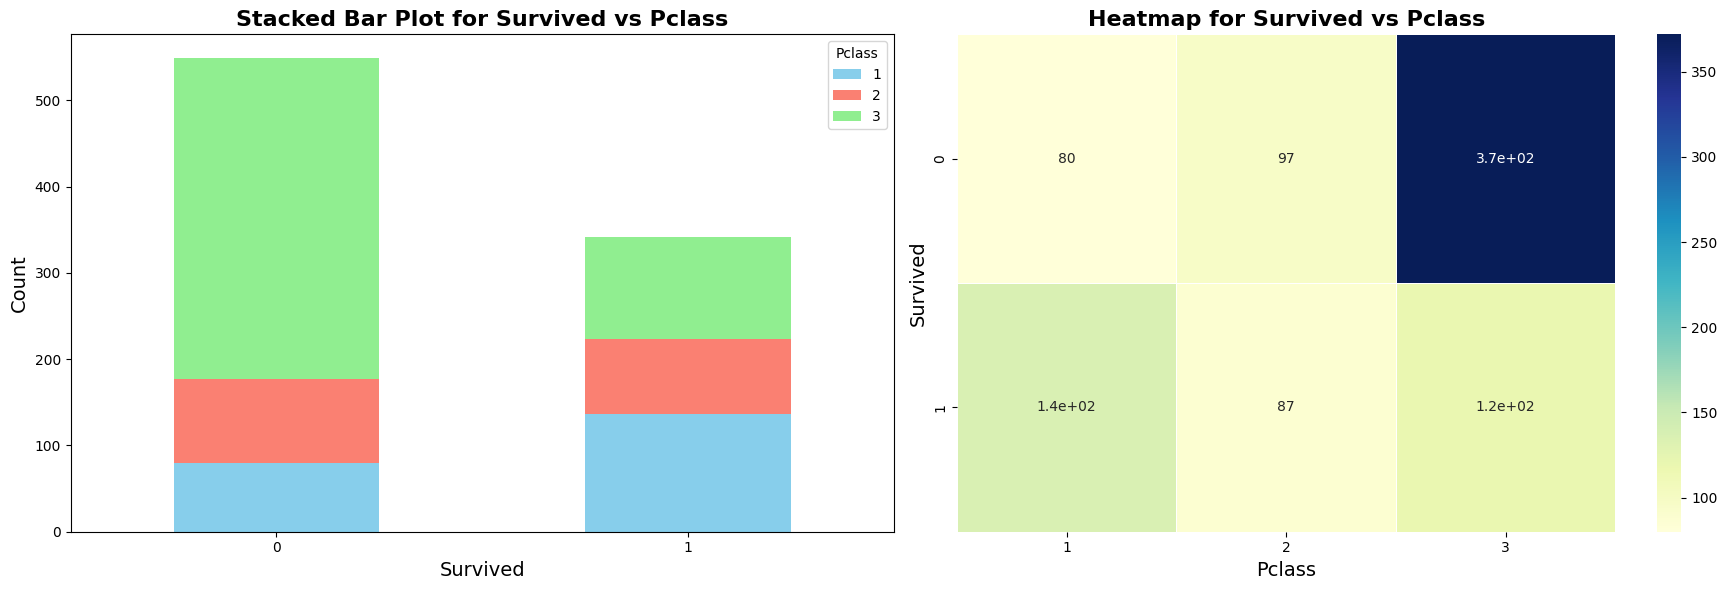

In [41]:
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)): 
        ctab = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        print(f"\033[1m Crosstab for {categorical_columns[i]} vs {categorical_columns[j]} \033[0m")
        print(ctab)
        print("\n")

        fig, axes = plt.subplots(1, 2, figsize=(18, 6))

        # Stacked Bar Plot
        ctab.plot(ax=axes[0], kind="bar", stacked=True, color=["skyblue", "salmon", "lightgreen"])
        axes[0].set_title(f"Stacked Bar Plot for {categorical_columns[i]} vs {categorical_columns[j]}", fontsize=16, fontweight='bold')
        axes[0].set_xlabel(categorical_columns[i], fontsize=14)
        axes[0].set_ylabel("Count", fontsize=14)
        axes[0].legend(title=categorical_columns[j])
        axes[0].tick_params(axis='x', rotation=0)

        # Heatmap
        sns.heatmap(ax=axes[1], data=ctab, annot=True, cmap="YlGnBu", linewidths=0.5)
        axes[1].set_title(f"Heatmap for {categorical_columns[i]} vs {categorical_columns[j]}", fontsize=16, fontweight='bold')
        axes[1].set_xlabel(categorical_columns[j], fontsize=14)
        axes[1].set_ylabel(categorical_columns[i], fontsize=14)
        axes[1].tick_params(axis='x', rotation=0)

        plt.tight_layout()
        plt.show()

#### 1. Sex vs Embarked
- The stacked bar plot shows a clear preference for Southampton (S) across both sexes.  A significantly higher number of both males and females embarked from Southampton compared to Cherbourg (C) or Queenstown (Q).  While the overall pattern is similar, males show a slightly higher proportion of embarkation from Southampton compared to females.
- The heatmap provides a striking visual representation of embarkation patterns, with a fiery intensity highlighting Southampton (S) as the dominant departure point for both sexes.  While Cherbourg (C) and Queenstown (Q) show a comparatively cooler reception, the overall warmth radiating from Southampton underscores its popularity.  A closer look reveals a subtle difference: the "male" row for Southampton burns a bit brighter than the "female" row, indicating a slightly higher proportion of male passengers embarking from this location.
---
#### 2. Sex vs Survived
- The stacked bar plot shows a clear survival disparity between sexes.  While males experienced a significantly higher number of deaths, females had a higher proportion of survivors.
- The heatmap shows that more women survived than men.  Many more men did not survive the disaster.
---
#### 3. Survived vs. Pclass
- The stacked bar plot reveals a strong correlation between passenger class and survival rates. First-class passengers had the highest survival rate, followed by second-class, while third-class passengers had the lowest survival chances. The contrast is particularly stark for third-class, where a majority did not survive.
- The heatmap vividly highlights the survival disparity across classes. First-class passengers exhibit a much warmer intensity in the survival category, while third-class is dominated by cooler tones, signifying higher mortality. The second-class passengers display a moderate balance between survival and non-survival.
---
#### 4. Survived vs. Embarked
- The stacked bar plot suggests that passengers who embarked from Cherbourg (C) had the highest survival rate, followed by those from Southampton (S), with Queenstown (Q) showing the lowest survival rate. This pattern may indicate differences in passenger class distribution across embarkation points.
- The heatmap emphasizes the survival advantage of Cherbourg (C) passengers, glowing warmly in the "Survived" row. In contrast, Queenstown (Q) exhibits a cooler tone in the survival row, reflecting its higher proportion of non-survivors. Southampton (S) maintains a more balanced distribution but still leans toward lower survival rates.
---
#### 5. Pclass vs. Embarked
- The stacked bar plot reveals that a large number of third-class passengers embarked from Southampton (S), while Cherbourg (C) had a higher proportion of first-class passengers. Queenstown (Q) was almost entirely populated by third-class travelers.
- The heatmap provides a striking visualization of embarkation trends. The Southampton (S) column exhibits intense warmth in the third-class row, indicating a high volume of third-class passengers. Meanwhile, Cherbourg (C) shows a stronger glow in the first-class row, aligning with its higher proportion of wealthier travelers.
---
#### 6. Pclass vs. Sex
- The stacked bar plot highlights a relatively balanced distribution of males and females in first and second class. However, third class is heavily dominated by male passengers, suggesting a larger proportion of male workers or immigrants.
- The heatmap amplifies this distinction, with a cooler shade in the "Female-Third Class" cell and a fiery glow in the "Male-Third Class" cell, emphasizing the strong male dominance in the lowest class. In contrast, the first-class row maintains a more evenly distributed intensity.
---
#### 7. Embarked vs. Sex
- The stacked bar plot shows that Southampton (S) had the highest number of embarked passengers for both sexes, with a slightly higher proportion of males. Cherbourg (C) had a more balanced gender distribution, while Queenstown (Q) had significantly more male passengers than female.
- The heatmap visually reinforces these observations, with Southampton (S) exhibiting a strong glow for both sexes but slightly brighter in the male row. Cherbourg (C) shows moderate warmth in both rows, while Queenstown (Q) has a noticeable male-skewed intensity.

## 4.3  Multivariate Analysis (Multiple Variables Exploration)

###  Pair plots to analyze multiple relationships simultaneously

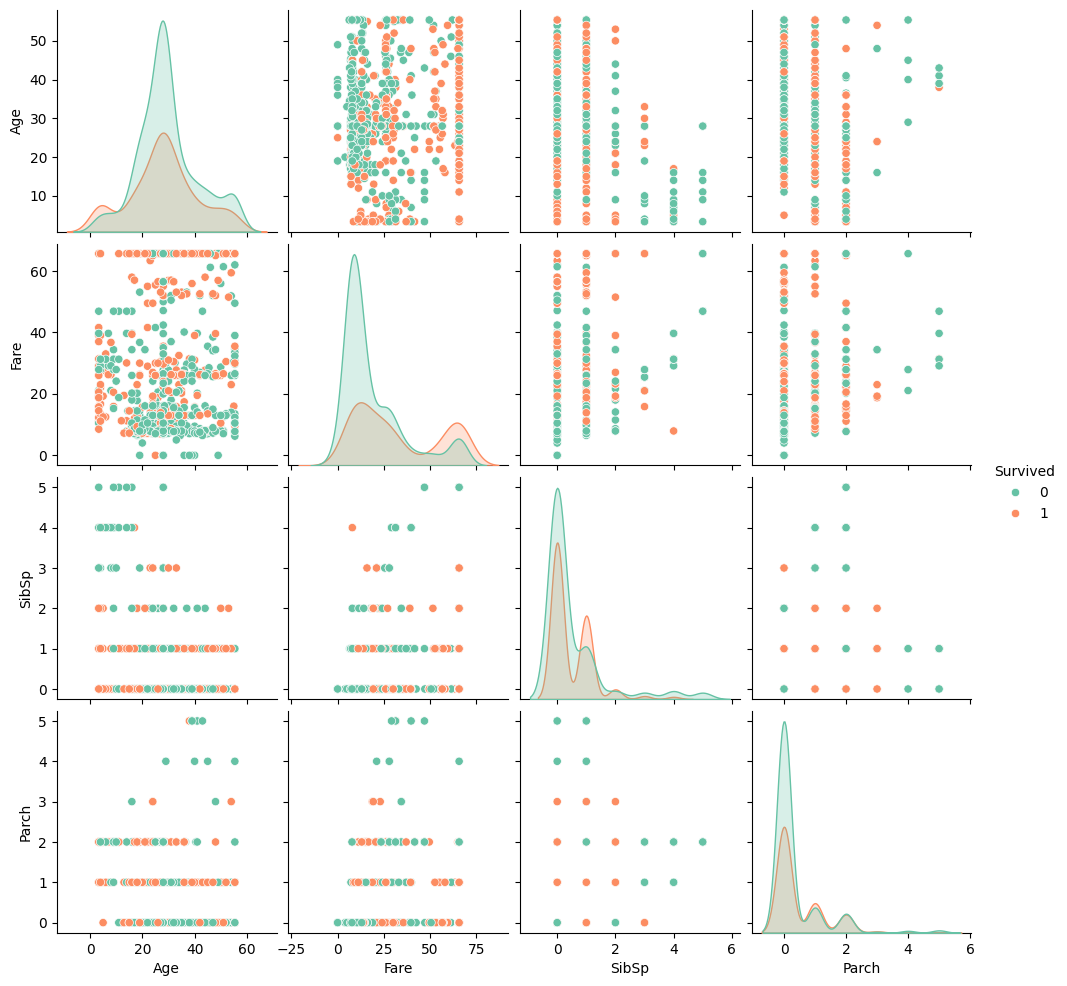

In [42]:
sns.pairplot(df, vars=numerical_columns, hue="Survived", palette="Set2")  
plt.show()

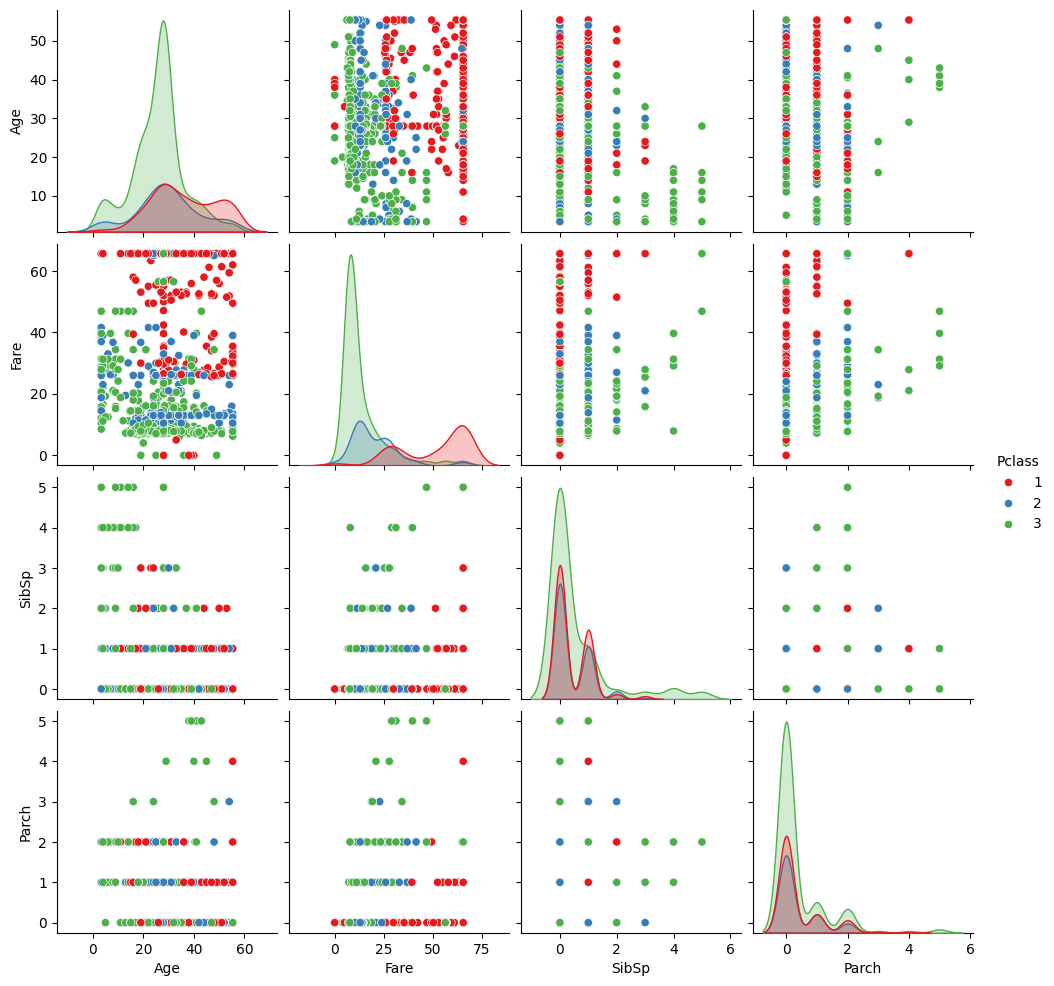

In [43]:
sns.pairplot(df, vars=numerical_columns, hue="Pclass", palette="Set1")  
plt.show()

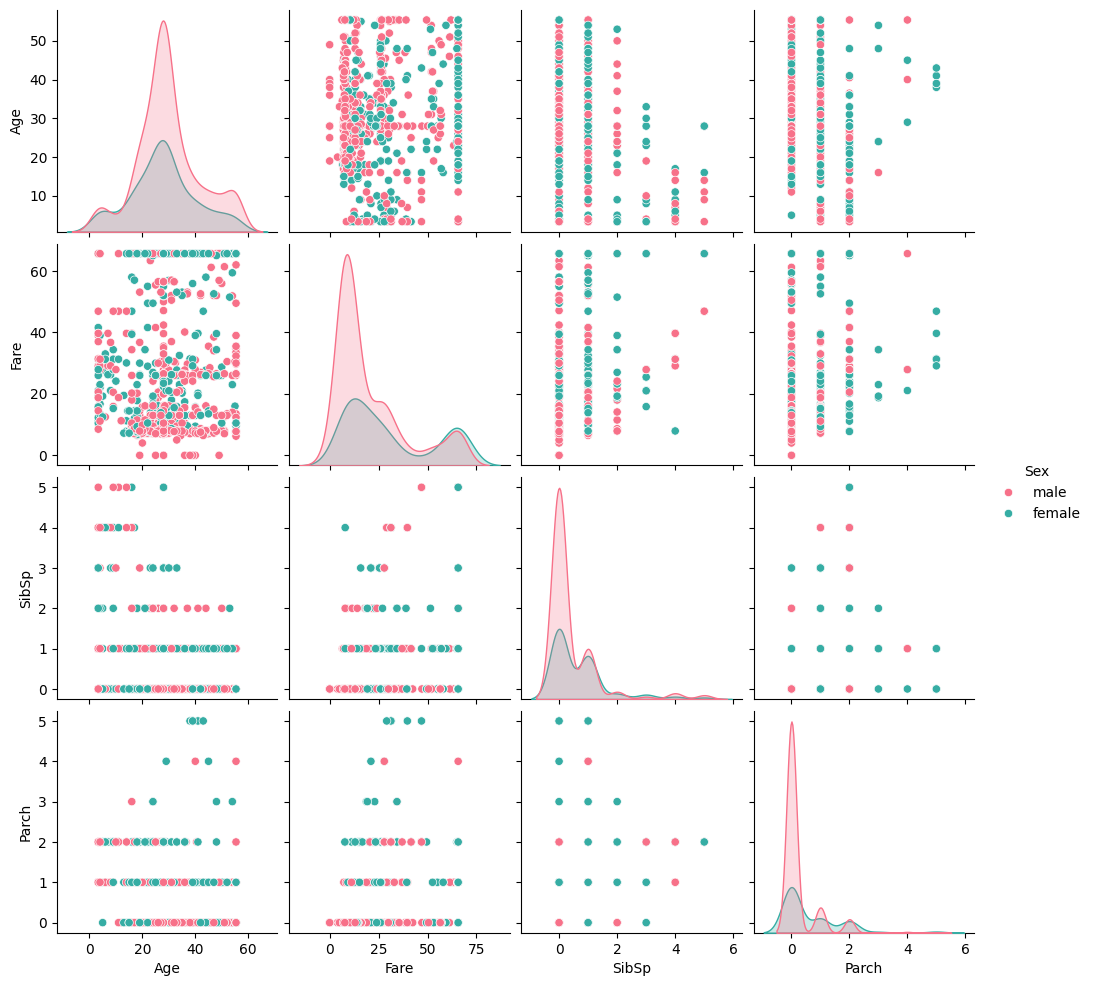

In [44]:
sns.pairplot(df, vars=numerical_columns, hue="Sex", palette="husl")  
plt.show()

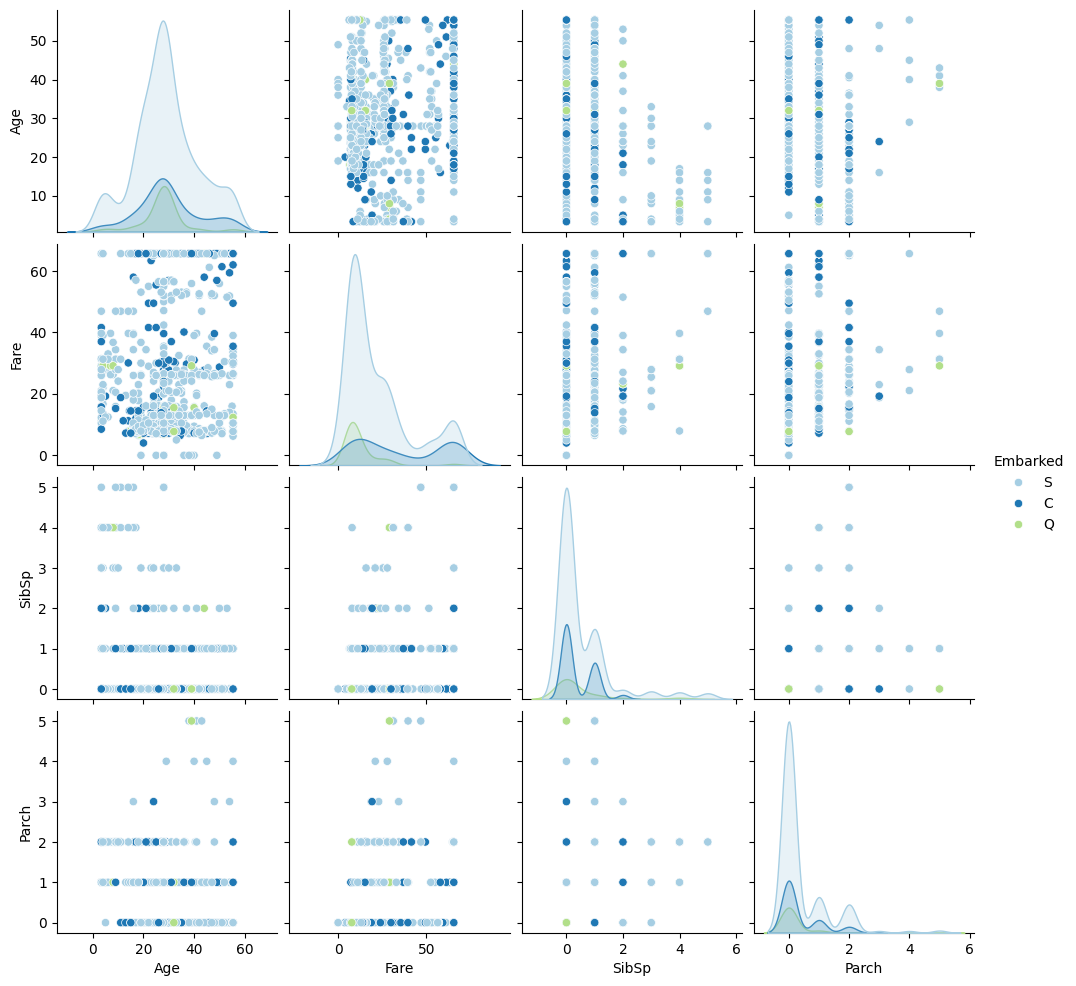

In [45]:
sns.pairplot(df, vars=numerical_columns, hue="Embarked", palette="Paired")  
plt.show()

#### Combined Analysis of Pair Plots
#### 1. Survival Trends
- Higher fare correlates with better survival chances.
- Younger passengers had a slight survival advantage.
---
#### 2. Pclass Influence
- First-class passengers were older and paid higher fares.
- Third-class passengers were younger with lower fares.
- Clear distinction between classes in numerical features.
---
#### 3. Gender Differences
- Females had higher survival rates and paid higher fares.
- Males had a wider age range and lower fare distribution.
---
#### 4. Embarkation Effects
- Cherbourg (C) passengers paid higher fares, likely first-class.
- Southampton (S) had more third-class, lower fares.
---
#### 5. Numerical Feature Patterns
- Fare vs. Age: Older passengers paid more.
- SibSp vs. Parch: Positive correlation (families traveled together).

###  Heatmaps to visualize correlations among multiple variables

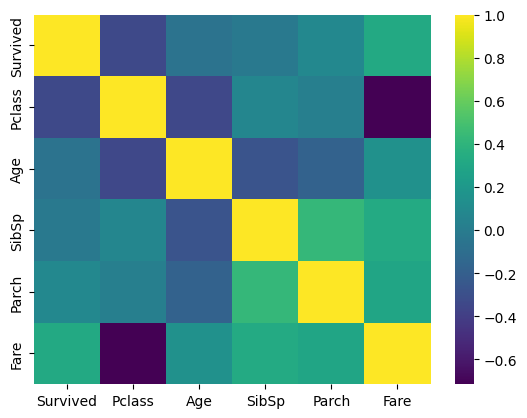

In [46]:
sns.heatmap(correlation_matrix, cmap="viridis")
plt.show()

#### Heatmap Analysis: Correlation Between Features

- The heatmap displays correlations between various features such as **SibSp, Age, Pclass, Survived, Fare, and Parch**.  
- The **strongest positive correlation** is observed between **Fare and Survived**, indicating that **passengers who paid higher fares had a better chance of survival**.  
- **Pclass shows a negative correlation with Survived**, suggesting that **lower-class passengers (higher Pclass numbers) had lower survival rates**.  
- **Age has a weak correlation** with survival, while **SibSp and Parch show minimal impact**.  
- **Overall, Fare and Pclass appear to be the most influential factors related to survival.**  


### Grouped comparisons to identify combined effects of multiple features.

### Scatter Plot with Multiple Features
- This plot includes
Age (x-axis)
Fare (y-axis)
Survival (color)
Sex (marker style)
Pclass (marker size)

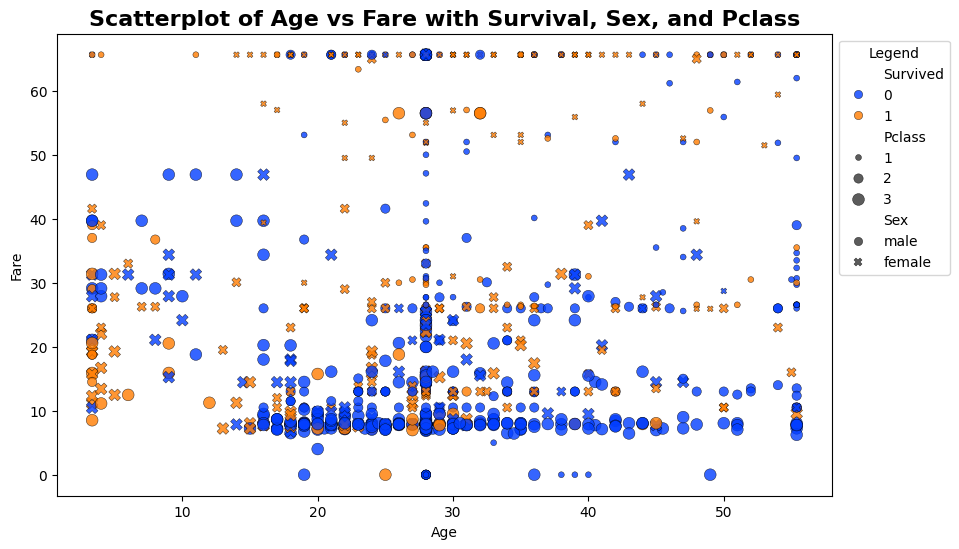

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived", style="Sex", size="Pclass", palette="bright", edgecolor="black", alpha=0.8)
plt.title("Scatterplot of Age vs Fare with Survival, Sex, and Pclass", fontsize=16, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Legend", bbox_to_anchor=(1, 1))
plt.show()

#### Scatterplot Analysis: Age vs. Fare  

- The scatterplot of **Age vs. Fare**, colored by **Survival, Sex, and Pclass**, reveals several trends:  
  - **Younger passengers** and those who **paid higher fares** (often in **Pclass 1**) had a **higher likelihood of survival**, as indicated by the concentration of "Survived" points in these areas.  
  - **Females** are more prevalent among survivors, especially in **higher fare ranges**.  
  - **Pclass 3 passengers**, who generally paid **lower fares**, show a **lower survival rate**.  
- **Overall, Age, Fare, Sex, and Class are interconnected factors** influencing survival outcomes.  

### Box Plot of Fare Across Multiple Categories

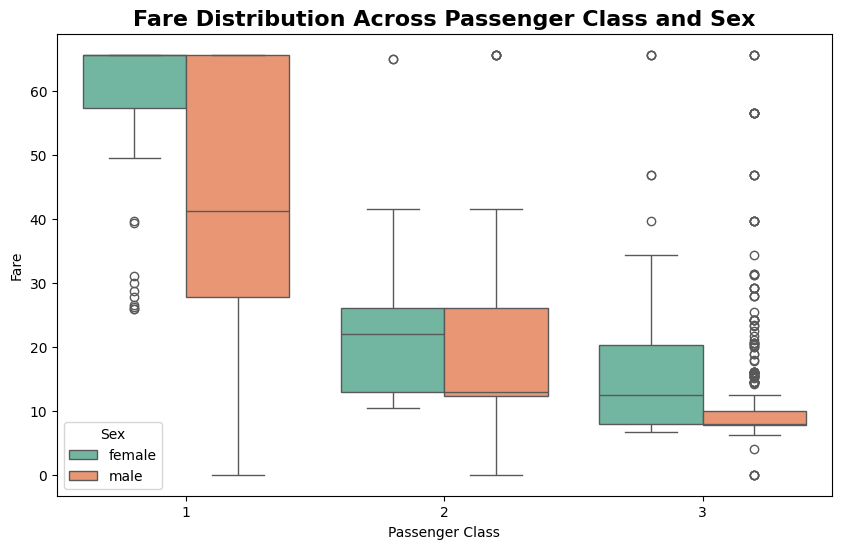

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Pclass", y="Fare", hue="Sex", palette="Set2", dodge=True)
plt.title("Fare Distribution Across Passenger Class and Sex", fontsize=16, fontweight='bold')
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.legend(title="Sex")
plt.show()

#### Fare Distribution by Passenger Class & Sex  

- The **fare distribution** across **passenger class and sex** reveals key trends:  
  - **Females generally paid higher fares** compared to males, particularly in **higher classes (Pclass 1 and 2)**.  
  - This suggests that **females were more likely to travel in premium classes**, which correlates with **higher fares**.  
  - **Males, on the other hand, were more concentrated in lower classes (Pclass 3)**, where fares are typically **lower**.  
- This distribution highlights the **influence of both sex and class on fare amounts**, with **females more frequently opting for higher-class travel**.  


### Boxplot: SibSp & Parch vs Survival

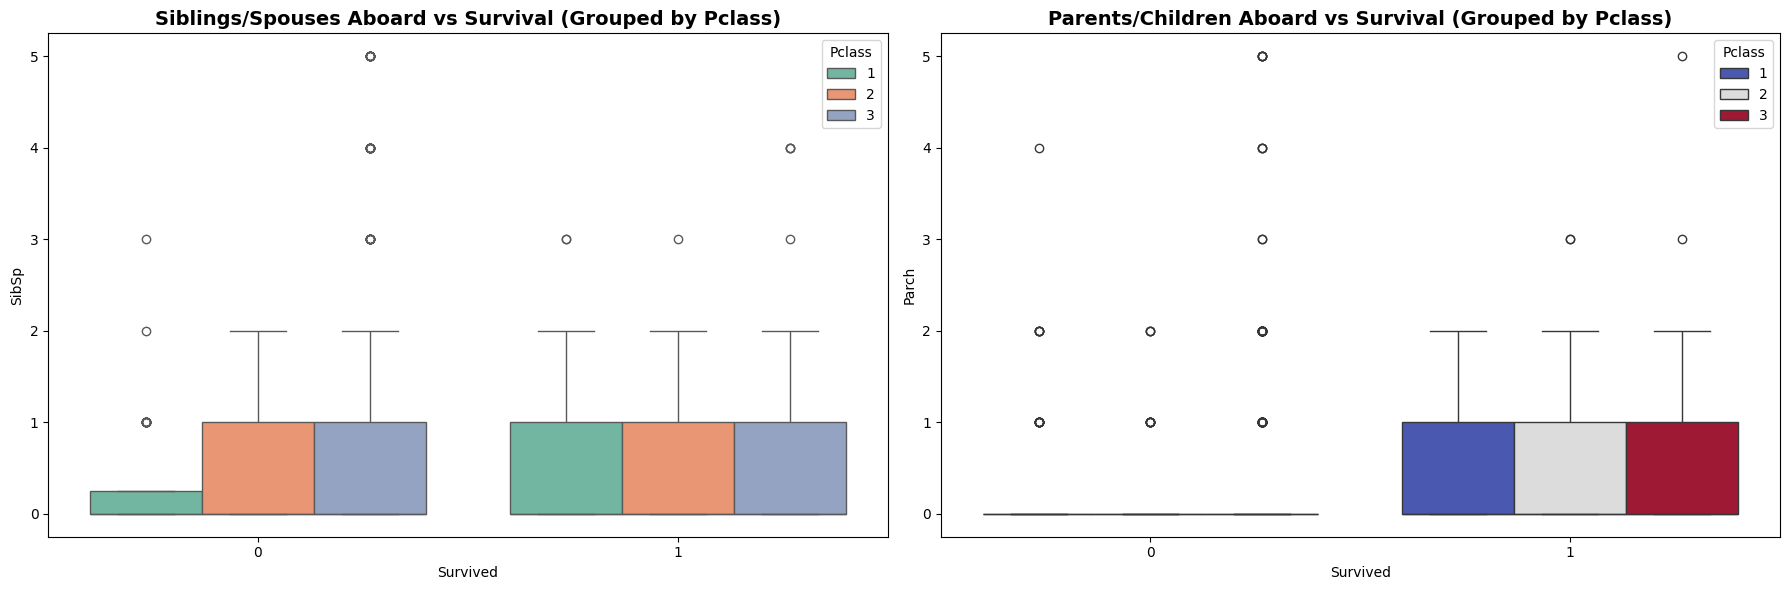

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(ax=axes[0], data=df, x="Survived", y="SibSp", hue="Pclass", palette="Set2")
axes[0].set_title("Siblings/Spouses Aboard vs Survival (Grouped by Pclass)", fontsize=14, fontweight='bold')

sns.boxplot(ax=axes[1], data=df, x="Survived", y="Parch", hue="Pclass", palette="coolwarm")
axes[1].set_title("Parents/Children Aboard vs Survival (Grouped by Pclass)", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### Siblings/Spouses Aboard vs. Survival (Grouped by Pclass)  

- **Survival rates vary based on the number of siblings/spouses and passenger class:**  
  - **Pclass 1:** Passengers with **fewer siblings/spouses had higher survival rates**.  
  - **Pclass 3:** Those with **more siblings/spouses tended to have lower survival rates**.  
- This suggests that **both family size and class influenced survival outcomes**, with **higher-class passengers benefiting from better access to lifeboats and resources**.  

---

#### Parents/Children Aboard vs. Survival (Grouped by Pclass)  

- **Survival rates differ based on the number of parents/children and passenger class:**  
  - **Pclass 1:** Passengers with **fewer parents/children had higher survival rates**.  
  - **Pclass 3:** Those with **more parents/children tended to have lower survival rates**.  
- This indicates that **both family size and class played a role in survival**, with **higher-class passengers likely having better access to lifeboats and resources**.  


### Stacked Bar Chart: Pclass, Embarked & Survival

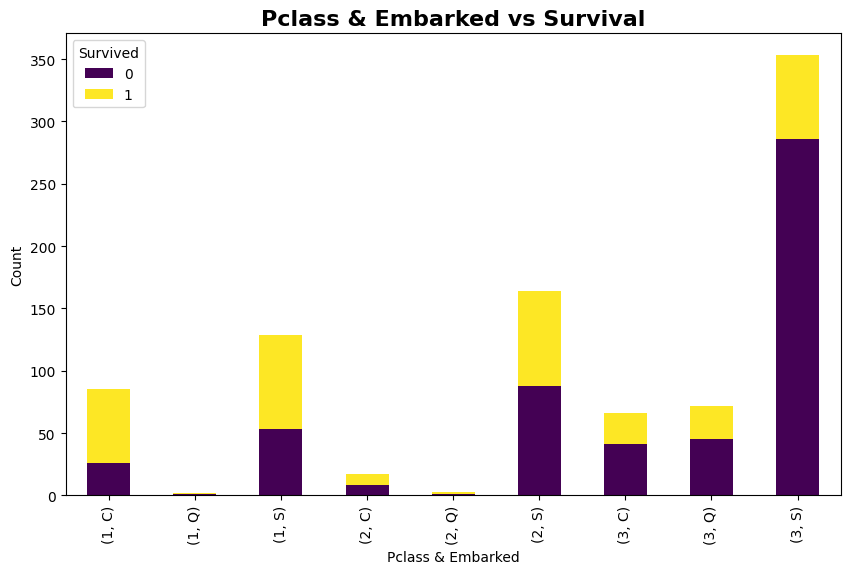

In [50]:
ctab = pd.crosstab([df["Pclass"], df["Embarked"]], df["Survived"])
ctab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))
plt.title("Pclass & Embarked vs Survival", fontsize=16, fontweight='bold')
plt.xlabel("Pclass & Embarked")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()


### Analysis of Pclass and Embarked vs. Survival

The analysis of **Pclass** and **Embarked** vs. **Survival** indicates that survival rates varied significantly based on passenger class and embarkation point. 

- **Higher-class passengers (Pclass 1)** had notably higher survival rates compared to those in lower classes (**Pclass 3**).
- Additionally, the **embarkation point** also influenced survival, with certain locations showing higher survival rates. This is likely due to differences in **passenger demographics** and access to **lifeboats**.

This suggests that both **socio-economic status** (reflected by Pclass) and **embarkation location** were critical factors in determining survival outcomes.


###  KDE Plot: Age Distribution by Survival

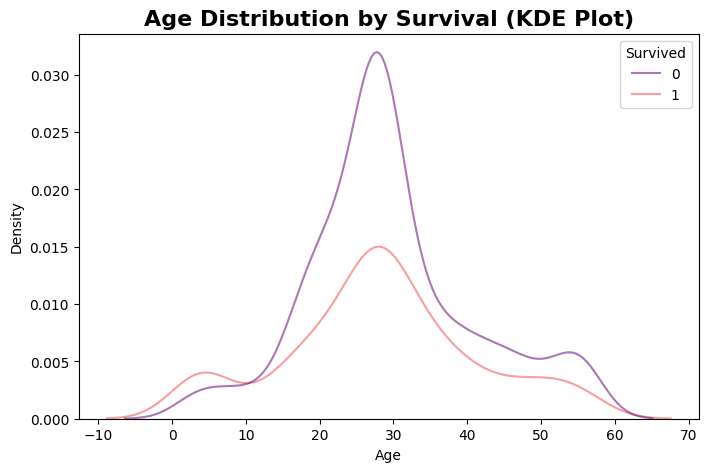

In [51]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Age", hue="Survived", fill=False, palette="magma", alpha=0.6)
plt.title("Age Distribution by Survival (KDE Plot)", fontsize=16, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


### KDE Plot of Age Distribution by Survival

The **KDE plot of age distribution by survival** indicates that **younger passengers**, especially **children**, had a higher survival rate, as evidenced by the pronounced peak in density for survivors at younger ages. 

- The distribution for **non-survivors** is broader, with a significant concentration in the **20-40 age range**.
  
This suggests that **age** played a crucial role in survival, with **children** being prioritized during rescue operations.


### Age Distribution by Survival & Pclass (FacetGrid)

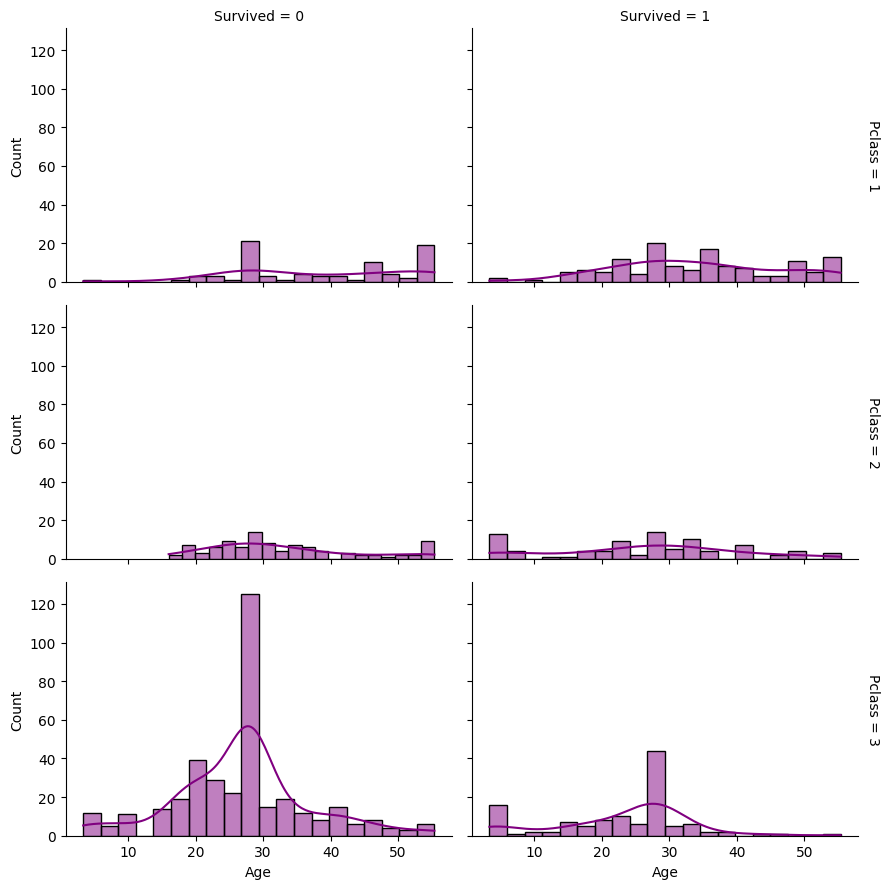

In [52]:
g = sns.FacetGrid(df, col="Survived", row="Pclass", margin_titles=True, height=3, aspect=1.5)
g.map_dataframe(sns.histplot, x="Age", kde=True, bins=20, color="purple")
g.set_axis_labels("Age", "Count")
plt.show()


### Combined Analysis of Age, Pclass, and Survival

The combined analysis shows that **younger passengers**, especially **children**, had higher survival rates, while **adults aged 20-40 in Pclass 3** faced the lowest survival rates. 

- **Higher-class passengers (Pclass 1 and 2)** had better survival outcomes, indicating that both **age** and **socio-economic status** significantly influenced survival.